## Вітаю вас на Mid-term проєкті!

Цей проєкт призначений для того, щоб ви могли оновити та закріпити знання, які ви отримали за перші місяці навчання на курсі "Machine Learning для людей".

### Основна задача

В цьому завданні Ви - Data Scientist в барнку. Ваша задача - побудувати модель для передбачення, чи оформить клієнт в банку строковий депозит (term deposit). З подібними задачами ми стикаємось в різних компаніях і доменах, коли хочемо зрозуміти, чи клієнт купить якийсь продукт, чи буде користуватись нашим сервісом/сайтом у наступному місяці, чи придбає підписку.

Вам треба не просто побудувати модель, а і пояснити замовнику (ваш замовник тут - це ми з кураторами) як працює ця модель і чому вона дає саме такі рішення. Без цього розуміння ми не можемо перейти до впроваждення (деплойменту) моделі в продакшен.

### Практичне застовування

В реальних робочих умовах в подібних задачах у Вас дані будуть зберігатись в базі данних в динаміці (різні дії користувачів з датою і часом). Тут дані вже загреговані по клієнтам і часто саме з цього ви будете починати побудову моделі передбачення, адже це відносно просто і зручно: загрегувати дані по клієнтам до певного часу і передбачати в майбутнє (тільки в випадку тренування моделі ML наше "майбутнє" теж фактично в минулому - бо ми хочемо мати мітки в даних, а от вже при використанні моделі в продакшені і бойових умовах ви справді будете робити передбачення в майбутнє). Тож, розвʼязуємо задачку!

### Датасет і ML задача

Для виконання завдання ми використаємо набір даних, який оригінально походить з сайту [UCI Machine Learning Repository], але там неточний опис даних і багато різних піднаборів, тому ми братимемо з Kaggle dataset: https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv.

Ці дані стосуються прямих маркетингових кампаній (телефонних дзвінків) португальської банківської установи. Кінцева мета класифікації - передбачити, чи підпише клієнт строковий депозит (змінна y).

Ми будемо працювати з файлом `bank-additional-full.csv`, скачати набір даних треба з Kaggle. Або можна скачати цей самий набір з гугл диска [тут](https://drive.google.com/file/d/1pDr0hAOnu1JsEiJeBu_F2Jv0GPxKiujW/view?usp=drive_link)

### Опис змінних

Цей опис є і на Kaggle, але ми переклали для вашої зручності і аби він був у вас перед очима під час роботи над проєктом.

#### **Дані про клієнта банку**:
1. **age** – вік клієнта (числова змінна).  
2. **job** – вид зайнятості (категоріальна змінна: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`).  
3. **marital** – сімейний стан (категоріальна змінна: `divorced`, `married`, `single`, `unknown`; примітка: `divorced` означає розлучений або вдівець/вдова).  
4. **education** – рівень освіти (категоріальна змінна: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`).  
5. **default** – чи є у клієнта прострочений кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
6. **housing** – чи має клієнт іпотечний кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
7. **loan** – чи має клієнт споживчий кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  

#### **Дані про останній контакт у межах поточної маркетингової кампанії**:
8. **contact** – тип зв’язку при останньому контакті (категоріальна змінна: `cellular`, `telephone`).  
9. **month** – місяць останнього контакту (категоріальна змінна: `jan`, `feb`, `mar`, …, `nov`, `dec`).  
10. **day_of_week** – день тижня останнього контакту (категоріальна змінна: `mon`, `tue`, `wed`, `thu`, `fri`).  
11. **duration** – тривалість останнього контакту в секундах (числова змінна).  
   ⚠ **Важлива примітка**: ця змінна має суттєвий вплив на цільову змінну (наприклад, якщо duration = 0, то y = `no`). Однак значення duration невідоме до здійснення дзвінка. Крім того, після завершення дзвінка значення y вже відоме. Тому цю змінну варто використовувати лише для порівняння моделей, але не включати у фінальну передбачувальну модель.  

#### **Інші атрибути**:
12. **campaign** – кількість контактів у межах поточної кампанії для цього клієнта (числова змінна, включає останній контакт).  
13. **pdays** – кількість днів, що минули з моменту останнього контакту клієнта у попередній кампанії (числова змінна; значення 999 означає, що клієнт раніше не контактувався).  
14. **previous** – кількість контактів, здійснених до цієї кампанії для цього клієнта (числова змінна).  
15. **poutcome** – результат попередньої маркетингової кампанії (категоріальна змінна: `failure`, `nonexistent`, `success`).  

#### **Атрибути соціально-економічного контексту**:
16. **emp.var.rate** – темп зміни зайнятості (щоквартальний показник, числова змінна).  
17. **cons.price.idx** – індекс споживчих цін (щомісячний показник, числова змінна).  
18. **cons.conf.idx** – індекс довіри споживачів (щомісячний показник, числова змінна).  
19. **euribor3m** – ставка Euribor на 3 місяці (щоденний показник, числова змінна).  
20. **nr.employed** – кількість працевлаштованих осіб (щоквартальний показник, числова змінна).  

#### **Цільова змінна**:
21. **y** – чи підписав клієнт строковий депозит? (бінарна змінна: `yes`, `no`).

### Ваше завдання на цей проєкт

Необхідно побудувати рішення цієї задачі бінарної класифікації. Для цього

1. Провести Exploratory Data Analysis і висунути гіпотези щодо впливу окремих ознак на цільову ознаку `y`.

2. Описати, які методи ви вважаєте доречним використовувати і обрати метрику оцінки якості моделей (метрику треба обґрунтувати).

3. Провести препроцесинг даних для подальшої їх передачі в модель. Препроцесинг має включати
  - обробку категоріальних змінних (якщо цього потребує модель)
  - групування категорій в категоріальних змінних, якщо потрібно
  - заповнення пропущених значень, якщо такі є
  - виявлення outliers і прийняття рішень, що з ними робити
  - створення додаткових ознак, які на ваш погляд поліпшать якість моделей ML.

4. Натренувати 4 різні типи моделей машинного навчання, з яких обовʼязково
  - Logistic Regression
  - kNN
  - Decision Tree
  - Принаймні один з алгоритмів бустингу

5. Створити таблицю з порівнянням якості моделей (в Google Spreadsheets або прямо в Jupyter Notebook), де зазначити
  - назву моделі
  - гіперпараметри
  - метрика якості моделі на тренувальному наборі
  - метрика якості моделі на валідаційному наборі даних
  - коментар до моделі - хороша вона, чи ні, чи варто її використовувати чи ні, чи є у вас подальші ідеї щодо експериментів з цією моделлю?

6. Для алгоритму бустингу виконати процедуру тюнингу гіперпараметрів двома способами
  - Sklearn: Randomized Search
  - Hyperopt: Bayesian Optimization.
  Виявити оптимальні гіперпараметри і зробити висновки про якість моделі в кожному з випадків.

7. Вивести важливість ознак для моделі, які показала себе найкраще і описати, чи вважаєте ви саме такий пріоритет важливості ознак адекватним з точки зору common sense?

8. Для найкращої провести аналіз впливу ознак на передбачення з допомогою бібліотеки SHAP.

9. Провести аналіз записів, в яких модель помиляється і на основі нього зазначити, яким чином можна поліпшити наявне рішення аби уникати наявних помилок?


### Результат виконання проєкту

Результатом виконання цього завдання є окремий github репозиторій з охайно оформленим Jupyter Notebook, частина коду може бути винесена в .py файли. Репозиторій має містити опис задачі, опис що було зроблено і які моделі використано, таблицю результатів експериментів (можна скріншотом або створити таблицю в Markdown форматі - див. Приклад) і висновки, що Ви досягли і що можна було б ще зробити для поліпшення результатів.


### Приклад проєкту

Для натхнення ви можете ознайомитись з проєктом, побудованим на основі цих даних за [цим посиланням](https://github.com/surtantheta/Bank_Marketing_Dataset_Machine_Learning_Project).




![](https://blogconcept2competence.wordpress.com/wp-content/uploads/2014/03/yoda.jpg)

In [1]:
%load_ext autoreload
%autoreload 2

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import shap
import matplotlib.pyplot as plt
from scipy.stats import randint, uniform, loguniform
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
from xgboost import XGBClassifier
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import roc_auc_score
from countplot import uni_cat_target_compare
from preprocess_data import preprocess_data
from predict_and_evaluate import predict_and_evaluate


## 1. EDA

In [3]:
raw_df = pd.read_csv("https://docs.google.com/spreadsheets/d/1xgQ871u5ut9--XR0NduM1PibCIHRl5uGc7DTddvSTrc/gviz/tq?tqx=out:csv&sheet=Sheet1")
raw_df = raw_df[~raw_df.duplicated()]
raw_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [5]:
len(raw_df.columns[raw_df.isnull().any()])

0

Завантаживши дані та очистивши від дублікатів ми отримали набір даних з 41176 записів де маємо 11 категоріальних змінних та 10 цифрових, в тому числі 1 цільова змінна, яка в свою чергу є категоріальною та містить лише 2 значення: 'no', 'yes'. Пропущених значень у даному наборі даних немає.

### Аналіз цільової змінної `y`

In [6]:
raw_df['y'].unique()


array(['no', 'yes'], dtype=object)

In [7]:
raw_df['y'].value_counts().sort_values(ascending = False)

y
no     36537
yes     4639
Name: count, dtype: int64

In [8]:
raw_df['y'].value_counts(normalize = True).sort_values(ascending = False) * 100

y
no     88.733728
yes    11.266272
Name: proportion, dtype: float64

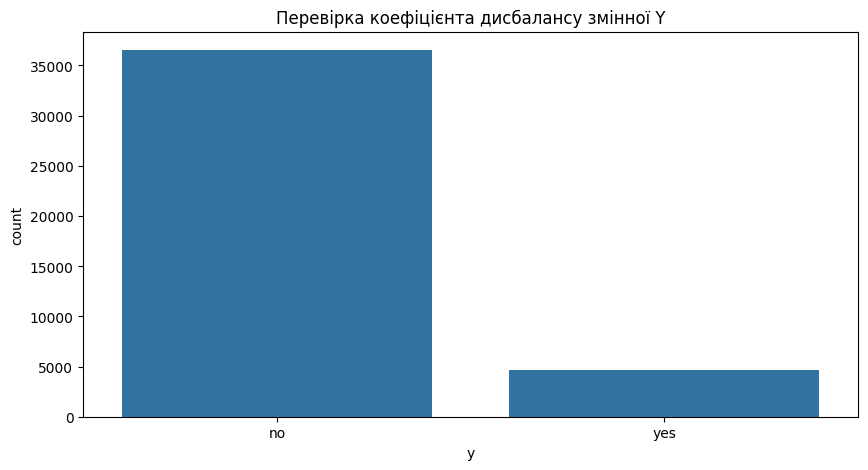

In [9]:
plt.figure(figsize = (10,5))
sns.countplot(x = raw_df['y'], data = raw_df)
plt.title('Перевірка коефіцієнта дисбалансу змінної Y')
plt.show()

**Спостереження**

- Ми маємо дисбаланс у змінній `Y` на основі % спостережень
 - Значення `Y` Yes - це клієнт, який не підписав довгостроковий депозит. Це лише 11,27% даних
 - Значення `Y` No - всі інші випадки. Це 88,73% даних

### Перевірка категоріальних змінних на аномальні значення

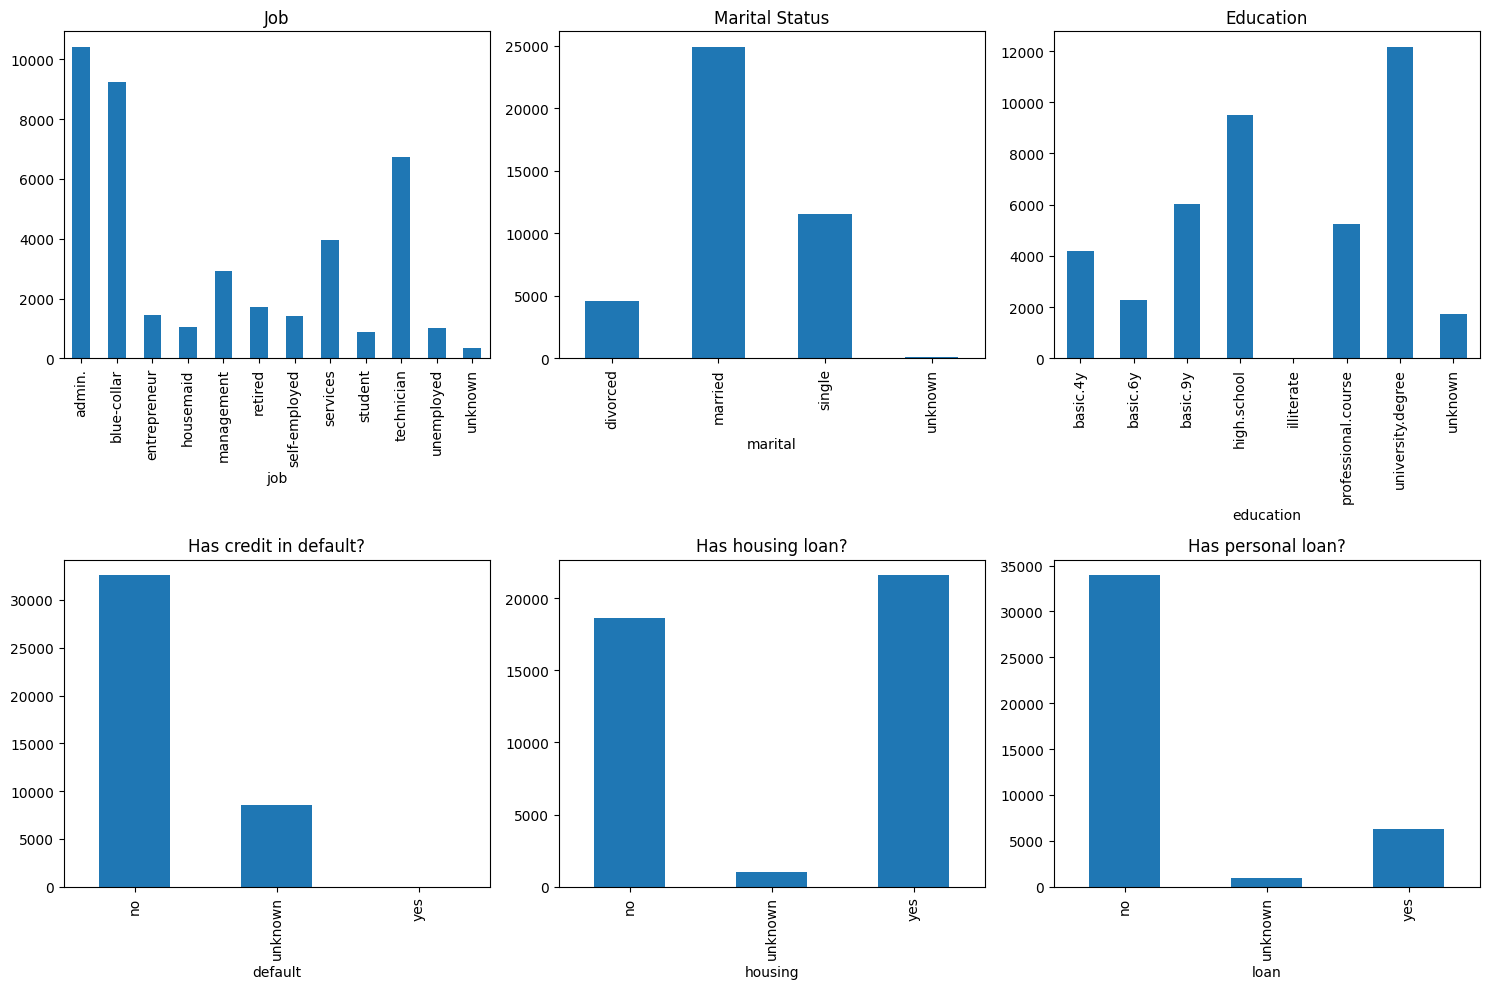

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']
titles = ['Job', 'Marital Status', 'Education',
          'Has credit in default?', 'Has housing loan?', 'Has personal loan?']

for i, col in enumerate(cols):
    raw_df[col].value_counts().sort_index().plot(kind='bar', ax=axes[i], title=titles[i])

plt.tight_layout()
plt.show()


В кожній з вище наведених колонках зустрічається значення `unknown`, тому потрібно детальніше дослідити та вивести відсоток таких значень по кожній колонці та кореляцію між таргетом і вирішити чи потрібно робити імпутації чи залишити дані такими як є

Відсоток 'unknown' у кожній колонці:
job           0.80
marital       0.19
education     4.20
default      20.88
housing       2.40
loan          2.40
dtype: float64


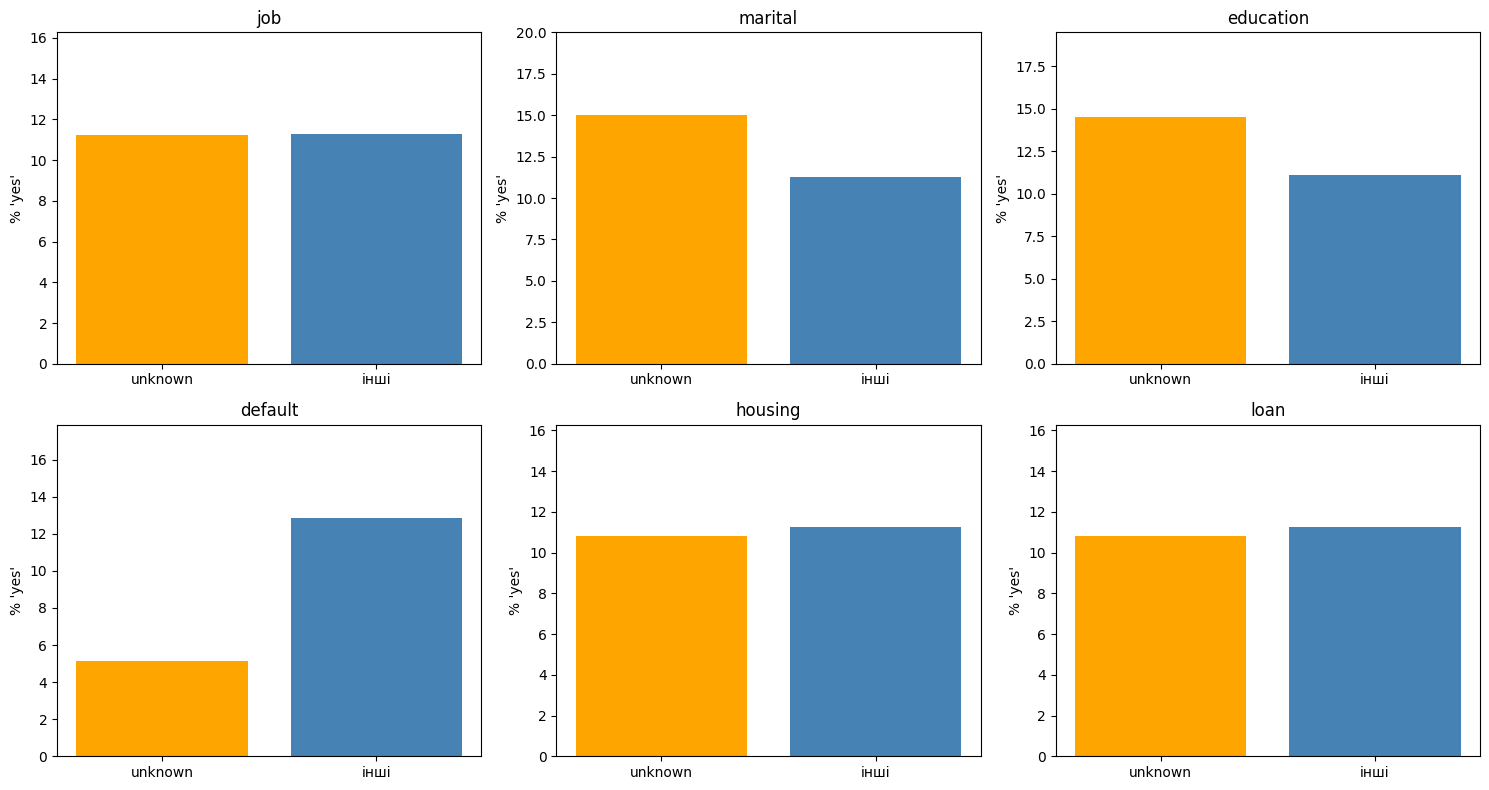

In [11]:
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']

unknown_perc = (raw_df[cols].isin(['unknown']).sum() / len(raw_df) * 100).round(2)

print("Відсоток 'unknown' у кожній колонці:")
print(unknown_perc)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
axes = axes.flatten()

for i, col in enumerate(cols):
    unknown_rows = raw_df[raw_df[col] == 'unknown']
    known_rows = raw_df[raw_df[col] != 'unknown']

    rate_unknown = (unknown_rows['y'] == 'yes').mean() * 100
    rate_known = (known_rows['y'] == 'yes').mean() * 100

    axes[i].bar(['unknown', 'інші'], [rate_unknown, rate_known], color=['orange','steelblue'])
    axes[i].set_title(col)
    axes[i].set_ylabel("% 'yes'")
    axes[i].set_ylim(0, max(rate_unknown, rate_known) + 5)

plt.tight_layout()
plt.show()


Для `job`, `housing`, `loan` різниця майже відсутня і тут `unknown` особливого сигналу не дає, але й видаляти не обов’язково. Для `marital`, `education` - у `unknown` частка підписок вища, ніж у відомих значень, варто залишати як окрему категорію оскільки це показує що клієнти які не бажають вказувати свою освіту і сімейний статус частіше схильні до підписання довгострокових депозитів. Для клієнтів з невідомим значеннями `default` протилежна ситуація коли `unknown` сильно менше (≈5% проти 13%). Тобто небажання вказати інформацію про борги може бути ознакою меншої ймовірності підписки.

Отже, `unknown` у датасеті не є «шумом» і несе певну інформацію. Її потрібно залишати такою як є.

### Heatmap кореляцій числових ознак з таргетом `y`

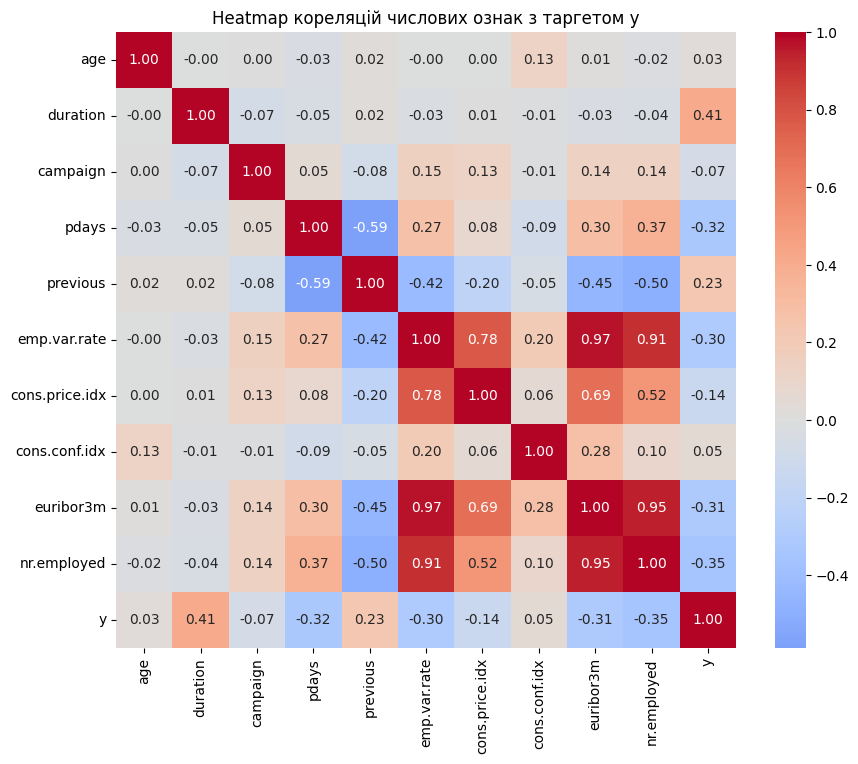

In [12]:
df_corr = raw_df.copy()
df_corr['y'] = (df_corr['y'] == 'yes').astype(int)

# залишимо тільки числові колонки
numeric_cols = df_corr.select_dtypes(include=['int64','float64']).columns

# матриця кореляцій
corr = df_corr[numeric_cols].corr()

# побудова heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Heatmap кореляцій числових ознак з таргетом y")
plt.show()


Гіпотези:

1. `duration` (+0.41) - чим довше триває розмова з клієнтом, тим вища ймовірність підписання депозиту. Але цю ознаку не можна використовувати для прогнозу наперед, оскільки вона стає відомою лише після дзвінка. Вона годиться тільки для інтерпретації.

2. `pdays` (–0.32) - якщо клієнта давно не контактували (велике значення pdays), він менш схильний погодитися. Якщо контакт був недавно (pdays ближче до 0) - більший шанс позитивної відповіді.

Гіпотеза: повторні дзвінки після короткої паузи підвищують ефективність.

2. `previous` (+0.23) - zкщо клієнт уже мав попередні контакти з банком, ймовірність підписки вища.

Гіпотеза: попередній досвід взаємодії з банком підвищує довіру і є більше шансів для підписання депозиту.

3. `euribor3m` (–0.31) - gри високих процентних ставках (Euribor 3 місяці) люди рідше підписуються на депозити.

Гіпотеза: депозит привабливіший у періоди низьких ставок.

4. `nr.employed` (–0.35) - При високому рівні зайнятості в економіці люди рідше погоджуються. Але ця ознака дуже сильно корелює з euribor3m тому варто лишати одну.

Гіпотеза: у стабільній економіці інтерес до депозитів знижується.

5. `emp.var.rate` (–0.30) - при кращих економічних умовах менше бажаючих на депозити. Сильно корелює з euribor3m і nr.employed.

Гіпотеза: негативні очікування щодо економіки стимулюють вкладення.

6. `campaign` (–0.07) - чим більше контактів у межах однієї кампанії, тим нижча ймовірність підписки.

Гіпотеза: повторні дзвінки в рамках однієї кампанії можуть відштовхувати клієнтів.

age, cons.price.idx, cons.conf.idx (майже 0) - ці змінні не мають помітного лінійного зв’язку з таргетом, але їх ще варто перевірити через взаємодії чи нелінійні моделі (наприклад, дерева рішень).

При побудові моделей в дата сеті залишимо лише `euribor3m` щоб уникнути мультиколінеарності


### Аналіз категоріальних ознак з таргетом `y`

Категоріальна змінна `job`:

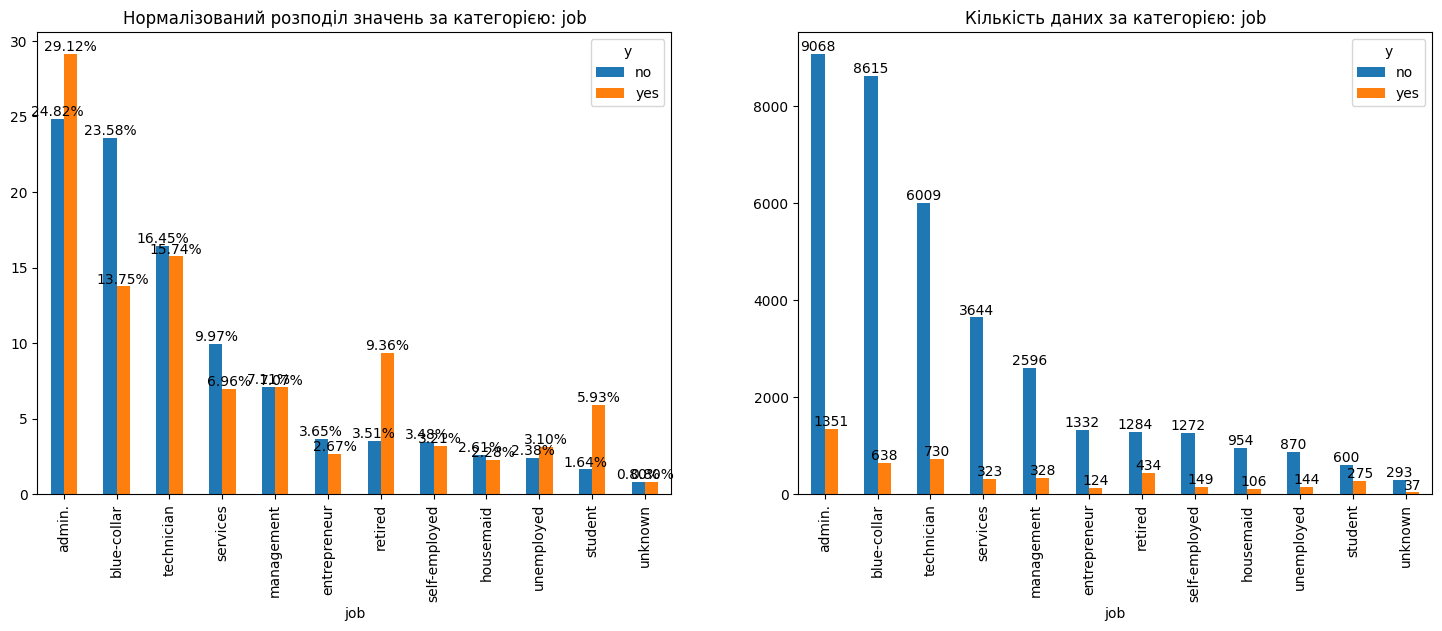

In [13]:
uni_cat_target_compare(raw_df, 'y', 'job')

Серед категорії `job`, найбільш перспективні для підписок групи: `retired` та `students`. Найменш перспективні - `blue-collar`. Інші професії тримаються на середньому рівні. Це означає, що категоріальна змінна `job` є важливим фактором і її обов’язково треба включати у модель (через one-hot encoding).

Категоріальна змінна `marital`:

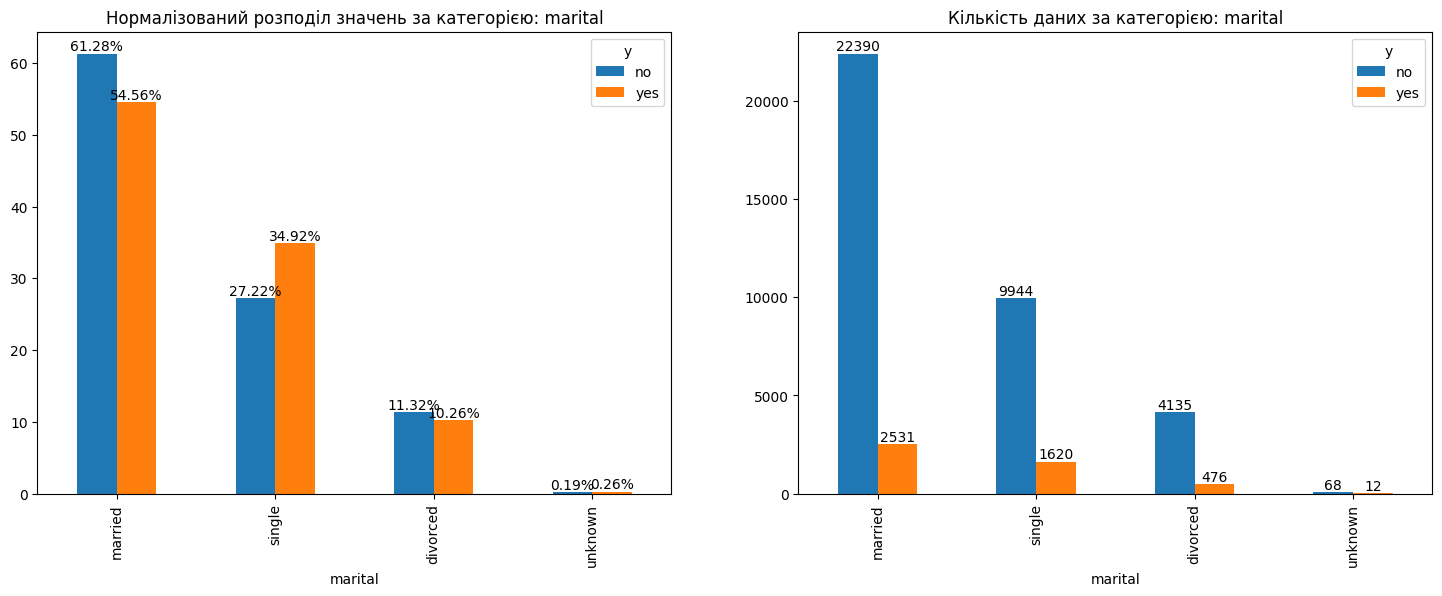

In [14]:
uni_cat_target_compare(raw_df, 'y', 'marital')

Найбільш перспективна група — `single`, вони частіше підписують депозит. Менш перспективна — `married`, навіть при тому що вони становлять найбільшу частину клієнтів. `Divorced` — майже не відрізняються від середнього.

Категоріальна змінна `education`:

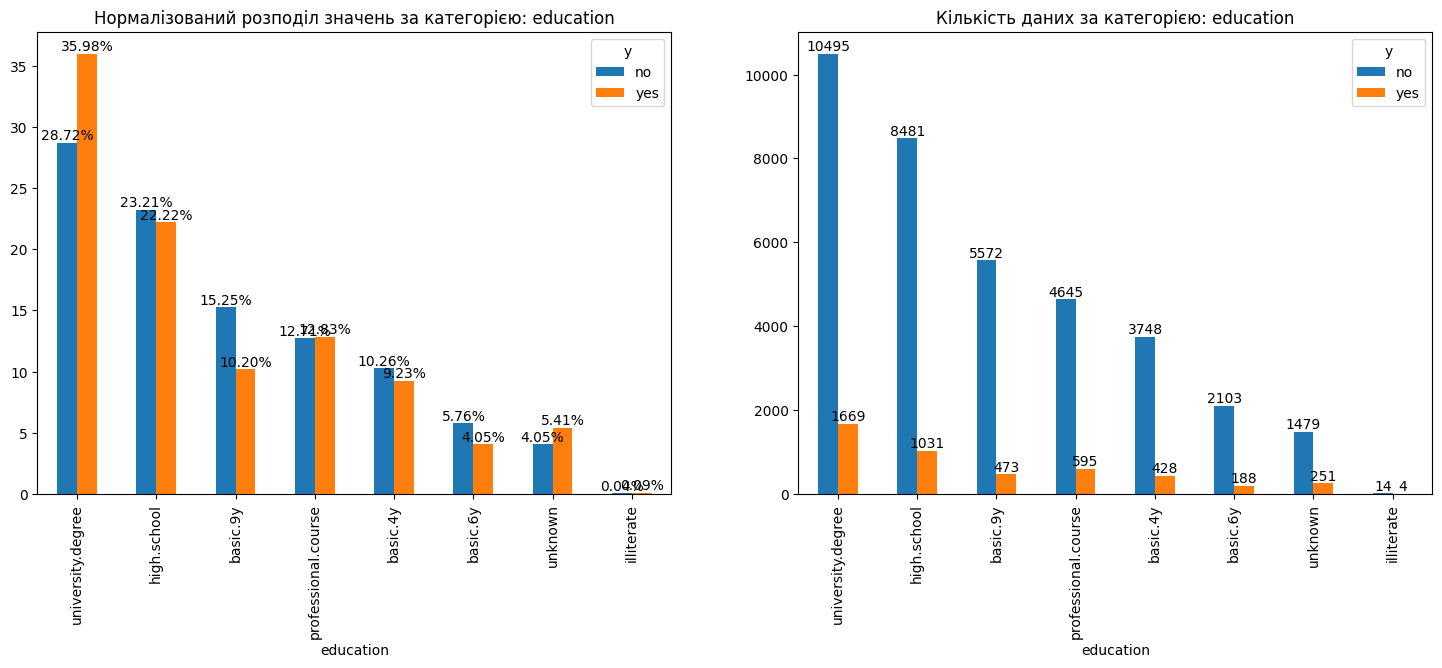

In [15]:
uni_cat_target_compare(raw_df, 'y', 'education')

Найбільш перспективні групи: клієнти з університетською освітою (чіткий позитивний сигнал). Менш перспективні: клієнти з базовою освітою (особливо basic.9y). High school та professional course: нейтральні. Unknown: може містити додатковий сигнал.

Категоріальна змінна `default`:

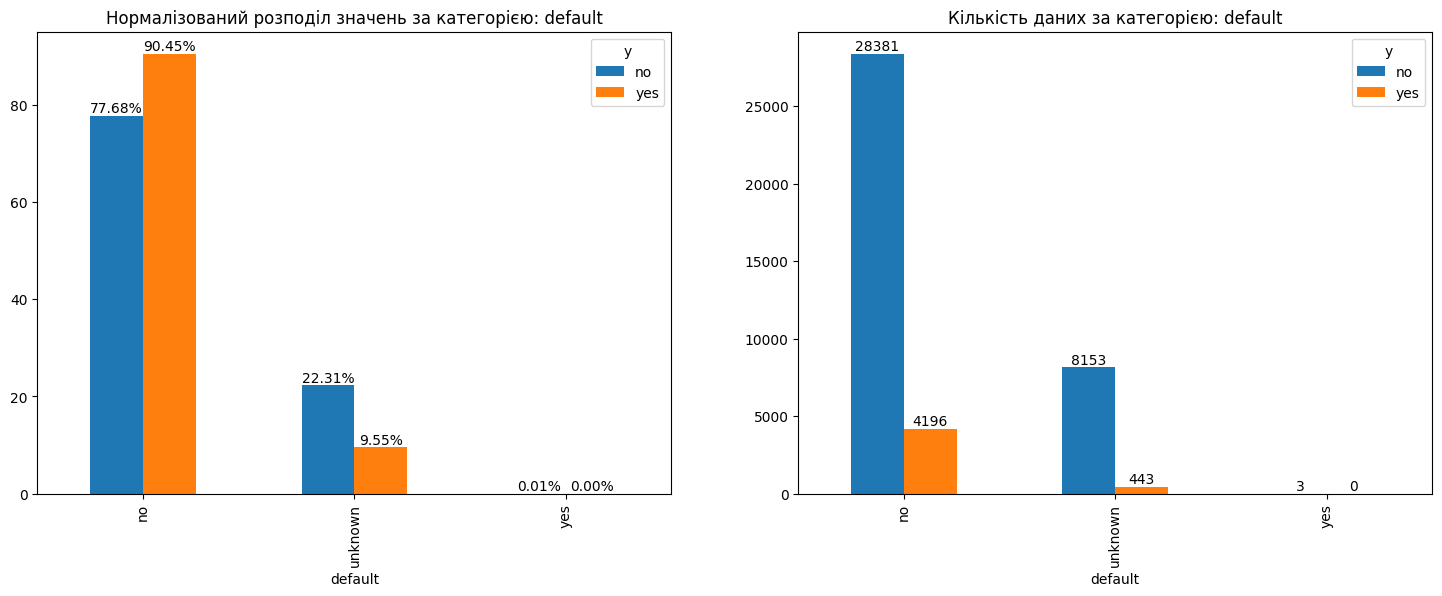

In [16]:
uni_cat_target_compare(raw_df, 'y', 'default')

Найбільш перспективні: клієнти без боргів (default = no).Найменш перспективні: ті, хто не вказує статус боргу (unknown) — вони демонструють набагато нижчу схильність до підписки.
Боржників фактично немає у даних, але навіть ці кілька випадків підтверджують очікувану негативну тенденцію.

Категоріальна змінна `loan`:

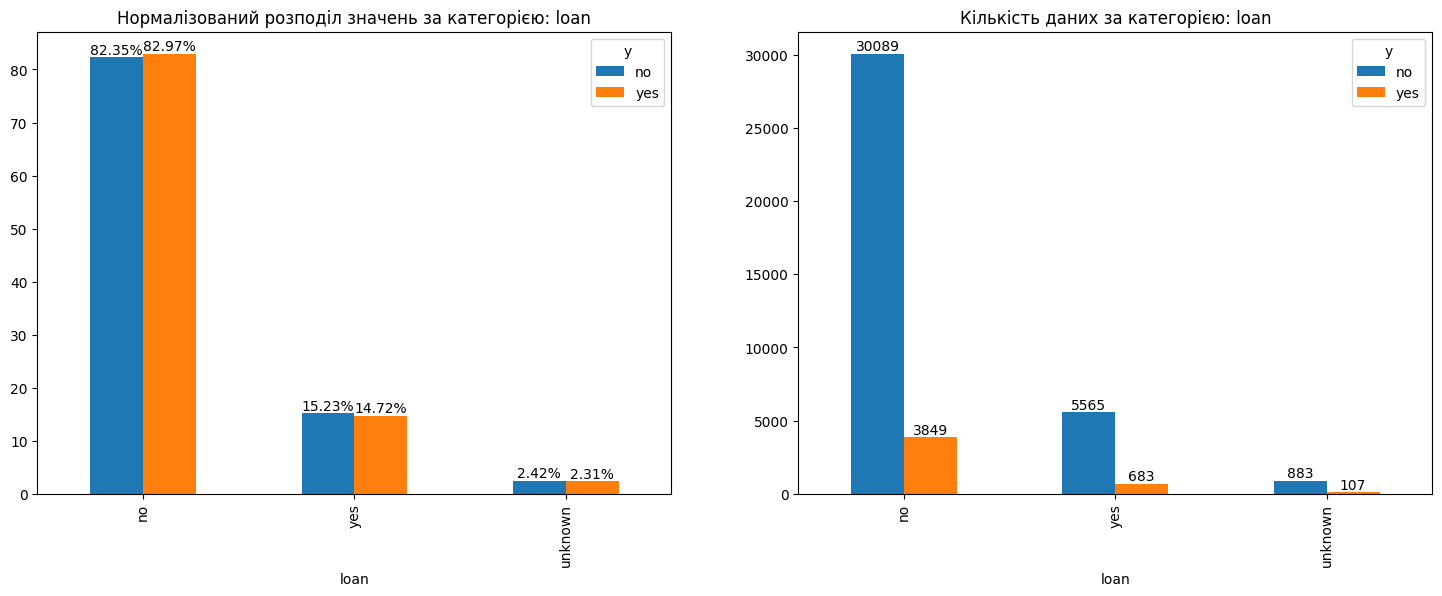

In [17]:
uni_cat_target_compare(raw_df, 'y', 'loan')

loan не має суттєвого впливу на таргет (кореляція дуже низька). Можна залишити як фічу для моделі, але не очікувати великого внеску в передбачення.

Категоріальна змінна `housing`:

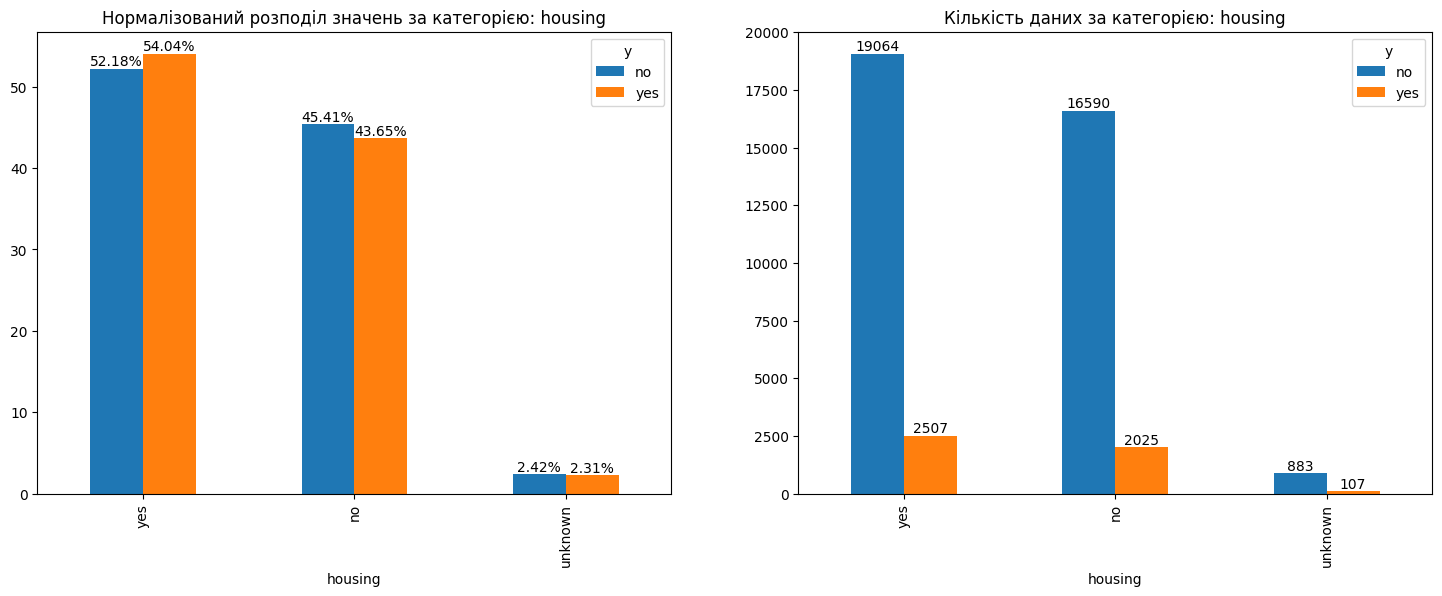

In [18]:
uni_cat_target_compare(raw_df, 'y', 'housing')

housing має невеликий, але помітний вплив: клієнти з іпотекою частіше погоджуються на депозит, ніж ті, у кого її немає. Це не найсильніший предиктор (на відміну від education, default чи job), але його варто залишити у моделі, бо він дає певний сигнал.

Отже, після аналізу ктегоріальних змінних, сильні фактори - це job, education, marital, default. Середні - housing. Слабкі - loan.
Unknown у більшості колонок не є шумом, а часто несе власний сигнал (особливо у default та education).

В загальному після аналізу числових та категоріальних змінних можна зробити висновок що:

-> Найсильніші предиктори:

    - Категоріальні: job, education, default, marital.

    - Числові: pdays, previous, euribor3m / nr.employed / emp.var.rate.

-> Середні предиктори:

    - Категоріальні:housing

    - Числові: campaign.

-> Слабкі предиктори: loan, age, cons.price.idx, cons.conf.idx.

-> Leakage - це duration — не можна використовувати в тренуванні, тільки для аналізу.

## 2. Методи, що доречні для використання і метрики оцінки якості моделей

1. Моделі:

  - Логістична регресія – проста модель, добре підходить як базовий варіант і легко пояснювати (показує, які фактори збільшують/зменшують шанс підписки).

  - Дерева рішень– дозволяють знайти складніші закономірності, працюють краще з великими наборами даних. Random Forest надійніший, бо складається з багатьох дерев.

  - Градієнтний бустинг (LightGBM) – сучасніші алгоритми, зазвичай показують найкращу точність у задачах класифікації.


2. Метрики:

  - Recall (повнота) – показує, скільки реальних "yes" модель змогла знайти. Важливо, щоб не пропустити клієнтів, які могли б підписати депозит.

  - Precision (точність) – показує, серед передбачених "yes" скільки справді підписали.

  - F1-score – середнє між precision і recall, зручно для загальної оцінки.

  - ROC-AUC  – показують якість моделі на різних порогах;

## 3. Препроцесинг даних

In [19]:
preprocessed_data = preprocess_data(raw_df, target_col='y')

In [20]:
X_train = preprocessed_data['X_train']
train_targets = preprocessed_data['train_targets']
X_val = preprocessed_data['X_val']
val_targets = preprocessed_data['val_targets']
input_cols = preprocessed_data['input_cols']
scaler = preprocessed_data['scaler']
encoder = preprocessed_data['encoder']

## 4. Тренування моделей

### 4.1. Logistic Regression

In [21]:
log_reg_model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
log_reg_model.fit(X_train, train_targets)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


F1 Score Train: 0.4414944054617865
AUC Score Train: 0.793182670311917
Classification Report Train:
               precision    recall  f1-score   support

           0       0.95      0.85      0.89     29229
           1       0.34      0.63      0.44      3711

    accuracy                           0.82     32940
   macro avg       0.64      0.74      0.67     32940
weighted avg       0.88      0.82      0.84     32940

Confusion Matrix Train:
 [[24722  4507]
 [ 1383  2328]]


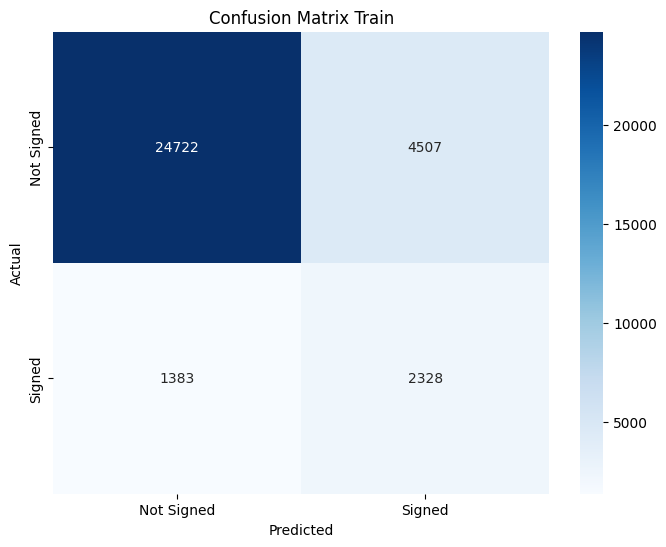

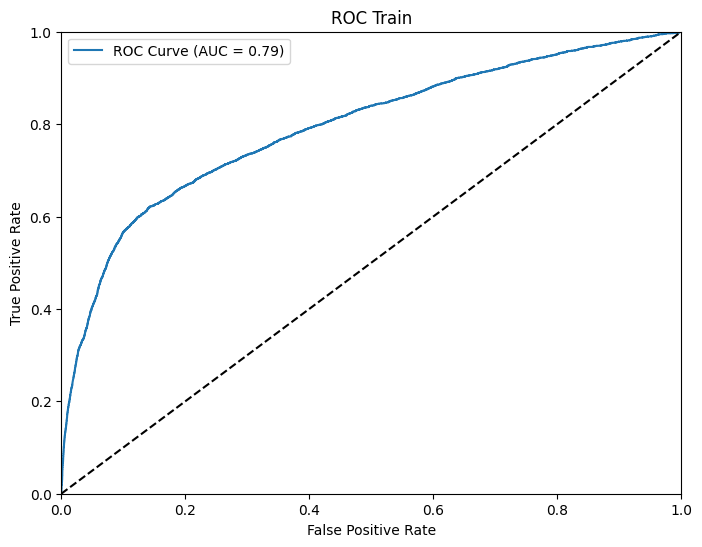

F1 Score Validation: 0.45311327831957987
AUC Score Validation: 0.7987271565879621
Classification Report Validation:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89      7308
           1       0.35      0.65      0.45       928

    accuracy                           0.82      8236
   macro avg       0.65      0.75      0.67      8236
weighted avg       0.88      0.82      0.84      8236

Confusion Matrix Validation:
 [[6174 1134]
 [ 324  604]]


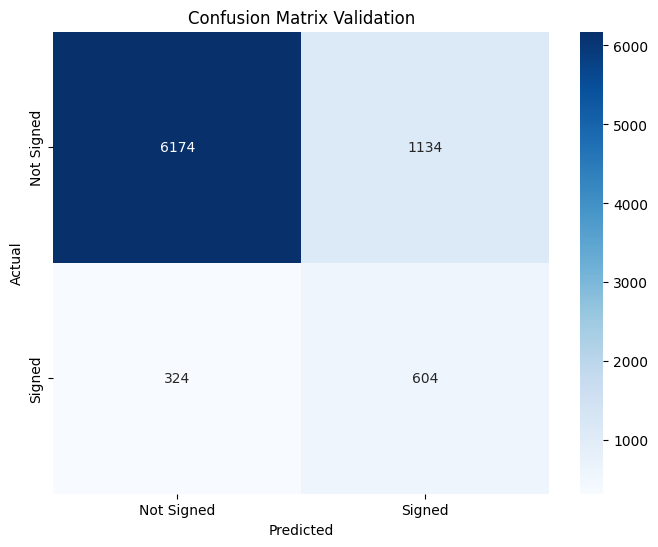

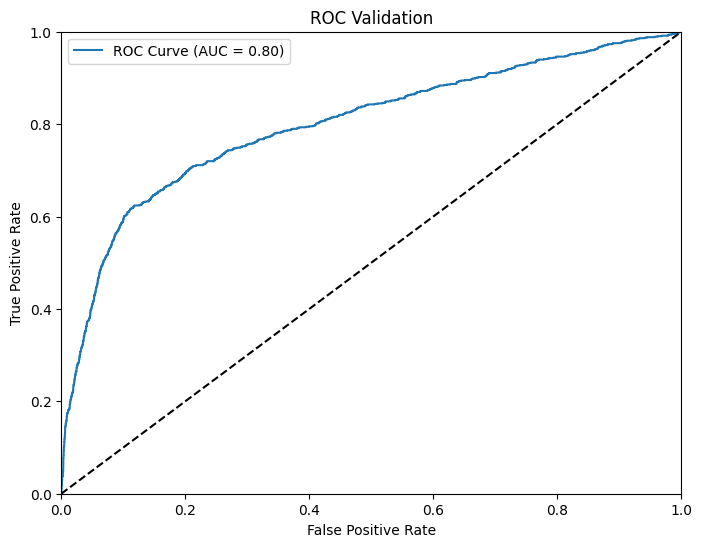

In [22]:
predict_and_evaluate(log_reg_model, X_train, train_targets, name='Train')
predict_and_evaluate(log_reg_model, X_val, val_targets, name='Validation')

### 4.2. kNN

In [23]:
knn = KNeighborsClassifier()
params_knn = {
    'n_neighbors': np.arange(1, 25)
    }
knn_gs = GridSearchCV(knn, params_knn, cv=5, scoring='roc_auc')
knn_gs.fit(X_train, train_targets)

knn_model = knn_gs.best_estimator_
knn_model.fit(X_train, train_targets)

,n_neighbors,np.int64(24)
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


F1 Score Train: 0.26023131672597866
AUC Score Train: 0.8421199045229762
Classification Report Train:
               precision    recall  f1-score   support

           0       0.90      0.99      0.95     29229
           1       0.75      0.16      0.26      3711

    accuracy                           0.90     32940
   macro avg       0.82      0.58      0.60     32940
weighted avg       0.89      0.90      0.87     32940

Confusion Matrix Train:
 [[29029   200]
 [ 3126   585]]


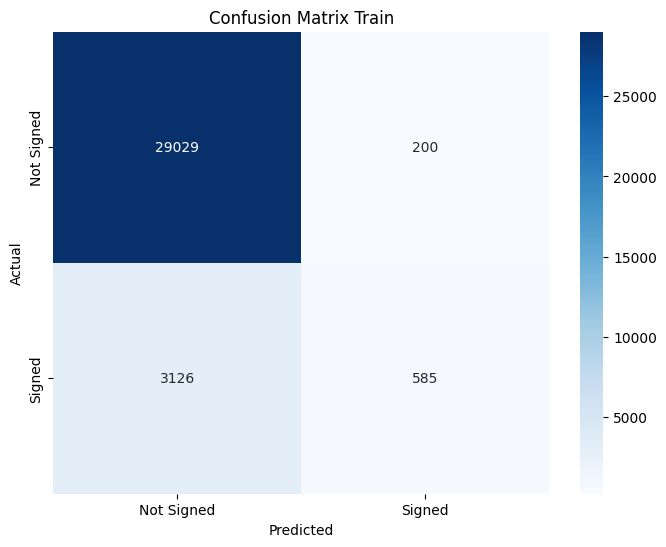

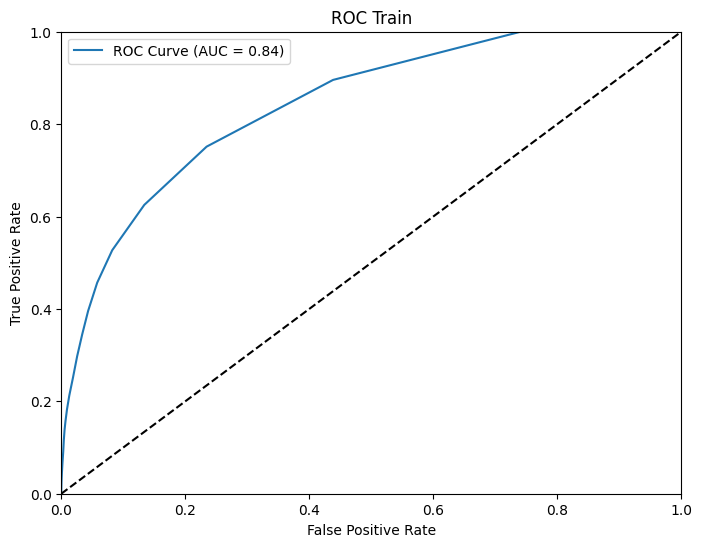

F1 Score Validation: 0.21942446043165467
AUC Score Validation: 0.757666669025914
Classification Report Validation:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7308
           1       0.66      0.13      0.22       928

    accuracy                           0.89      8236
   macro avg       0.78      0.56      0.58      8236
weighted avg       0.87      0.89      0.86      8236

Confusion Matrix Validation:
 [[7246   62]
 [ 806  122]]


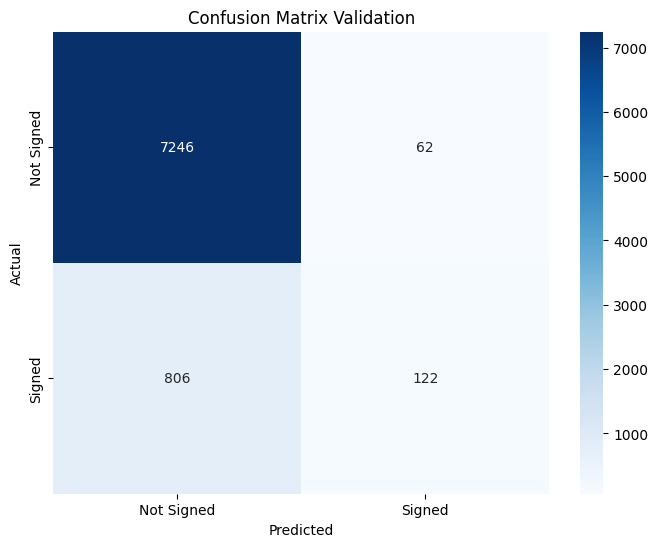

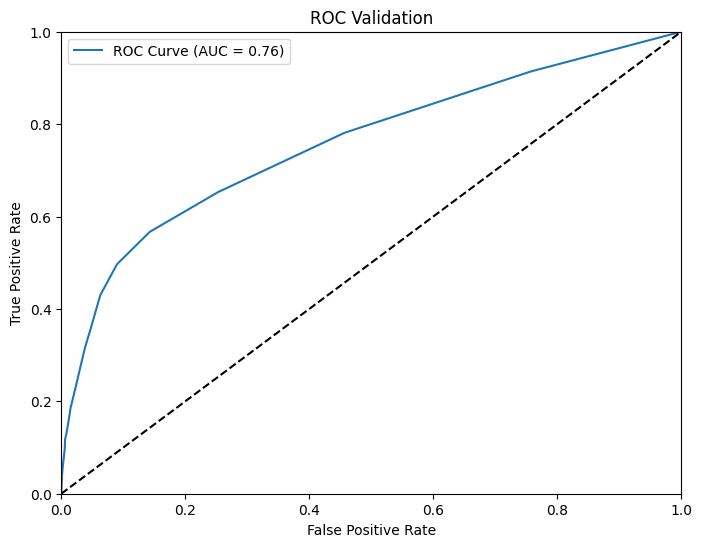

In [24]:
predict_and_evaluate(knn_model, X_train, train_targets, name='Train')
predict_and_evaluate(knn_model, X_val, val_targets, name='Validation')

### 4.3. Decision Tree

In [25]:
dtc = DecisionTreeClassifier(random_state=42)
dtc_params = {
    'max_depth': np.arange(1, 21, 2),
    'max_leaf_nodes': np.arange(2, 10, 1)
}
dtc_gs = GridSearchCV(dtc, dtc_params, cv=3, scoring='roc_auc')
dtc_gs.fit(X_train, train_targets)
dtc_model = dtc_gs.best_estimator_

dtc_model.fit(X_train, train_targets)

,criterion,'gini'
,splitter,'best'
,max_depth,np.int64(5)
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,np.int64(9)
,min_impurity_decrease,0.0
,class_weight,None


F1 Score Train: 0.29624893435635125
AUC Score Train: 0.7708177084513108
Classification Report Train:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     29229
           1       0.71      0.19      0.30      3711

    accuracy                           0.90     32940
   macro avg       0.81      0.59      0.62     32940
weighted avg       0.88      0.90      0.87     32940

Confusion Matrix Train:
 [[28943   286]
 [ 3016   695]]


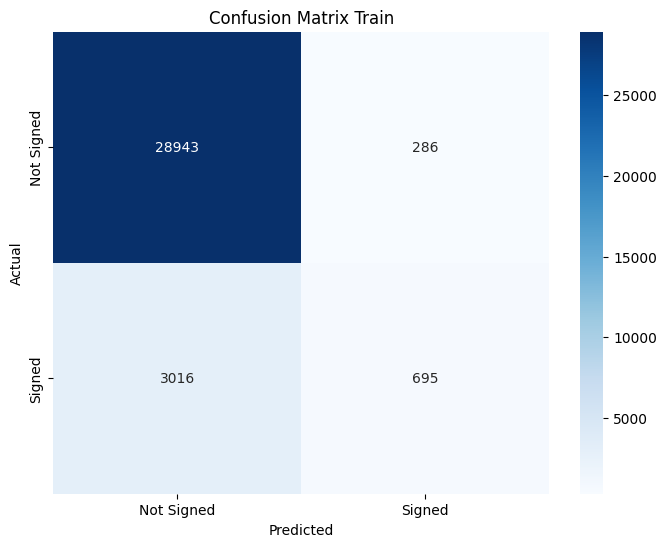

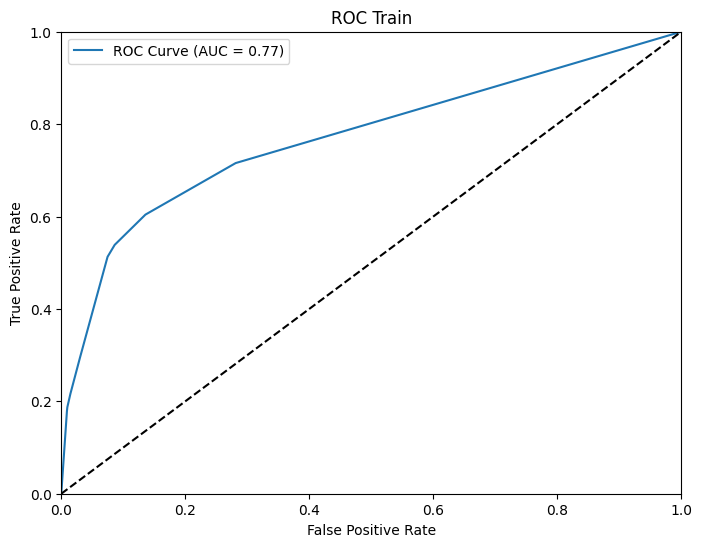

F1 Score Validation: 0.2832618025751073
AUC Score Validation: 0.7870201290980126
Classification Report Validation:
               precision    recall  f1-score   support

           0       0.90      0.99      0.95      7308
           1       0.70      0.18      0.28       928

    accuracy                           0.90      8236
   macro avg       0.80      0.58      0.61      8236
weighted avg       0.88      0.90      0.87      8236

Confusion Matrix Validation:
 [[7236   72]
 [ 763  165]]


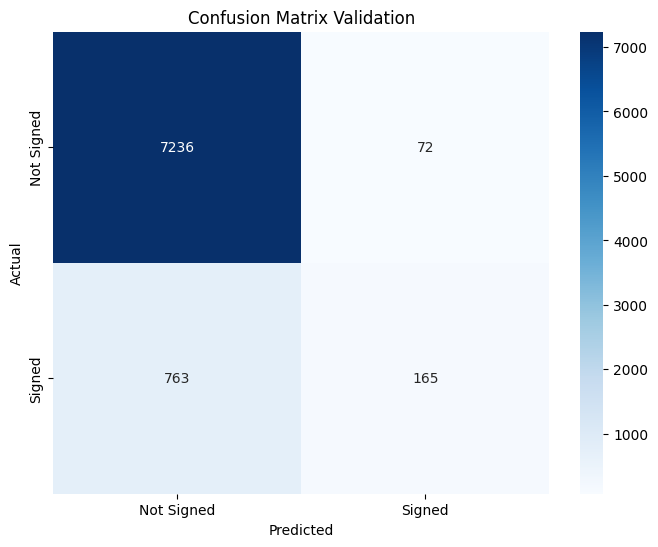

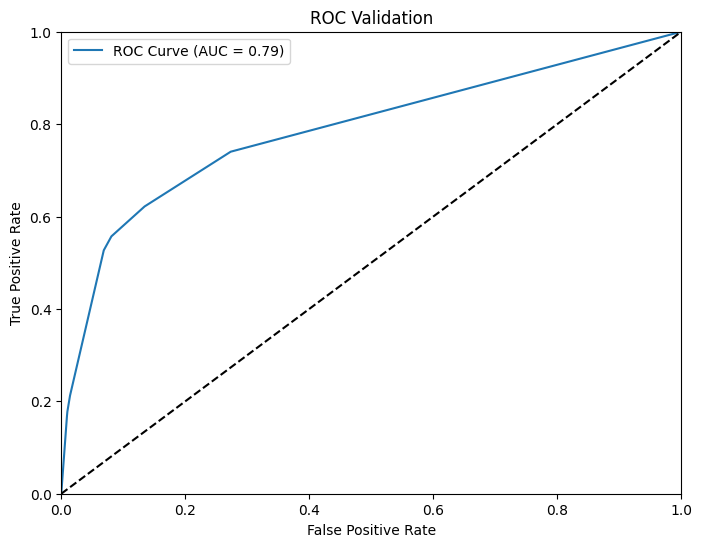

In [26]:
predict_and_evaluate(dtc_model, X_train, train_targets, name='Train')
predict_and_evaluate(dtc_model, X_val, val_targets, name='Validation')

### 4.4. XGBoost

#### 4.4.1. XGBoost RandomizedSearchCV

In [27]:
xgb = XGBClassifier(
    objective='binary:logistic',
    tree_method='hist',
    random_state=42,
    n_jobs=-1
)

params_dt = {
    'n_estimators': randint(300, 1200),
    'max_depth': randint(3, 10),
    'learning_rate': loguniform(1e-3, 3e-1),
    'subsample': uniform(0.6, 0.4),          # 0.6..1.0
    'colsample_bytree': uniform(0.6, 0.4),   # 0.6..1.0
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0.0, 5.0),
    'reg_alpha': loguniform(1e-8, 1e-1),
    'reg_lambda': loguniform(1e-2, 10.0),
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_rs = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=params_dt,
    n_iter=50,
    scoring='roc_auc',
    cv=cv,
    refit=True,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

xgb_rs.fit(X_train, train_targets)

xgb_rs_model = xgb_rs.best_estimator_
xgb_rs_model.fit(X_train, train_targets)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,np.float64(0.6835674870461441)
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [28]:
# RandomizedSearchCV best params
display(xgb_rs.best_params_)

{'colsample_bytree': np.float64(0.6835674870461441),
 'gamma': np.float64(3.355717584120253),
 'learning_rate': np.float64(0.007734131730970359),
 'max_depth': 9,
 'min_child_weight': 2,
 'n_estimators': 1084,
 'reg_alpha': np.float64(0.008723455790871151),
 'reg_lambda': np.float64(0.025695909517346828),
 'subsample': np.float64(0.8835643987640474)}

F1 Score Train: 0.4284064665127021
AUC Score Train: 0.8352569414441583
Classification Report Train:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     29229
           1       0.75      0.30      0.43      3711

    accuracy                           0.91     32940
   macro avg       0.83      0.64      0.69     32940
weighted avg       0.90      0.91      0.89     32940

Confusion Matrix Train:
 [[28857   372]
 [ 2598  1113]]


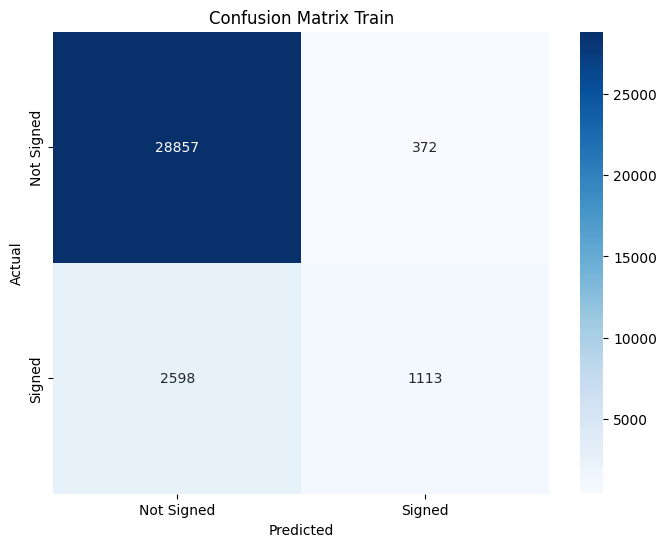

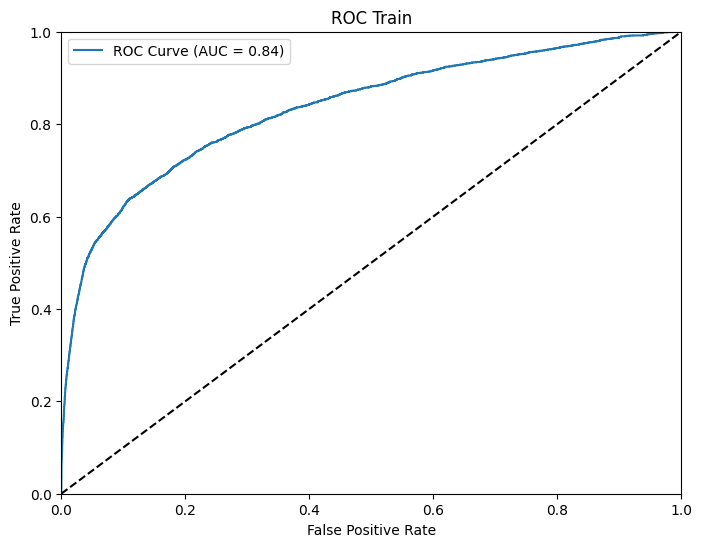

F1 Score Validation: 0.35403726708074534
AUC Score Validation: 0.816759915916426
Classification Report Validation:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      7308
           1       0.63      0.25      0.35       928

    accuracy                           0.90      8236
   macro avg       0.77      0.61      0.65      8236
weighted avg       0.88      0.90      0.88      8236

Confusion Matrix Validation:
 [[7176  132]
 [ 700  228]]


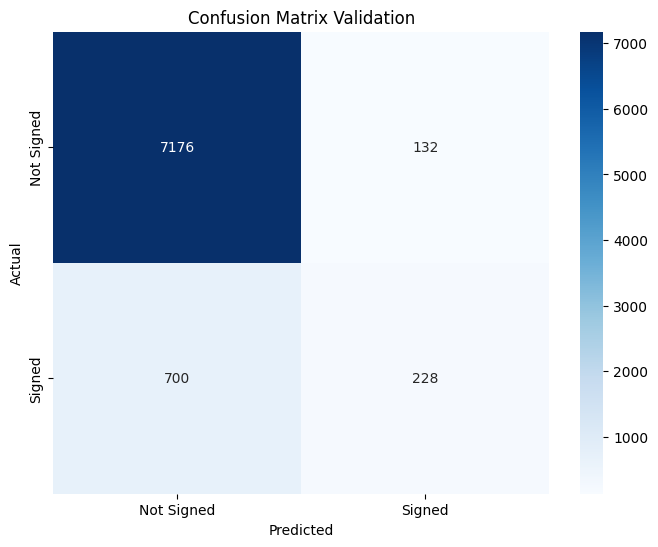

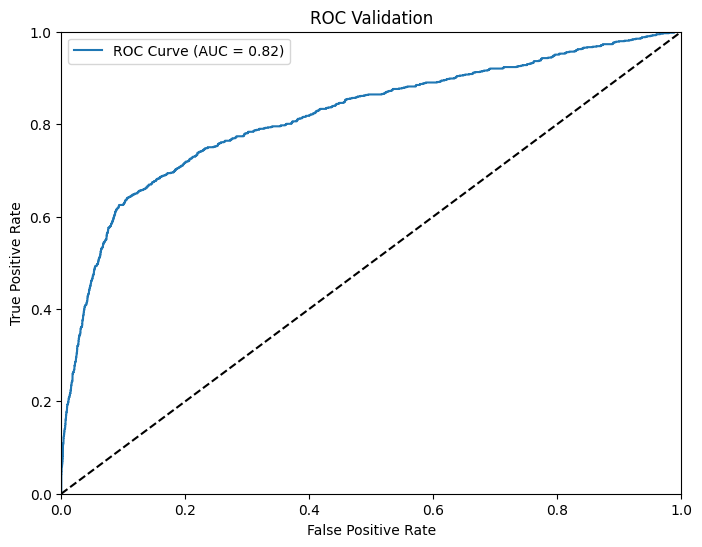

In [29]:
predict_and_evaluate(xgb_rs_model, X_train, train_targets, name='Train')
predict_and_evaluate(xgb_rs_model, X_val, val_targets, name='Validation')

#### 4.4.2. XGBoost Hyperopt

In [30]:
def objective(params):
  model = XGBClassifier(
      n_estimators=int(params['n_estimators']),
      max_depth=int(params['max_depth']),
      learning_rate=params['learning_rate'],
      subsample=params['subsample'],
      colsample_bytree=params['colsample_bytree'],
      gamma=params['gamma'],
      reg_alpha=params['reg_alpha'],
      reg_lambda=params['reg_lambda'],
      random_state=42,
      enable_categorical=True,
      missing=np.nan,
      early_stopping_rounds=10
  )

  model.fit(X_train, train_targets, eval_set=[(X_val, val_targets)], verbose=False)
  val_roc_auc = roc_auc_score(val_targets, model.predict_proba(X_val)[:, 1])
  return {'loss': -val_roc_auc, 'status': STATUS_OK}

space = {
    'n_estimators': hp.quniform('n_estimators', 50, 100, 10),
    'max_depth': hp.quniform('max_depth', 5, 10, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.1),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    'gamma': hp.uniform('gamma', 0, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1)
}

trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials
)

best_params = {
    'n_estimators': int(best['n_estimators']),
    'max_depth': int(best['max_depth']),
    'learning_rate': best['learning_rate'],
    'subsample': best['subsample'],
    'colsample_bytree': best['colsample_bytree'],
    'reg_alpha': best['reg_alpha'],
    'reg_lambda': best['reg_lambda']
}

xgb_model = XGBClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    reg_alpha=best_params['reg_alpha'],
    reg_lambda=best_params['reg_lambda'],
    random_state=42,
    enable_categorical=True,
    missing=np.nan
)

xgb_model.fit(X_train, train_targets)

100%|██████████| 100/100 [00:17<00:00,  5.59trial/s, best loss: -0.8195351280127589]


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,np.float64(0.9243896415301669)
,device,None
,early_stopping_rounds,None
,enable_categorical,True
,eval_metric,None


In [31]:
# Hyperopt best params
display(best_params)

{'n_estimators': 50,
 'max_depth': 8,
 'learning_rate': np.float64(0.035900430466106276),
 'subsample': np.float64(0.9986167833055978),
 'colsample_bytree': np.float64(0.9243896415301669),
 'reg_alpha': np.float64(0.0782929764253297),
 'reg_lambda': np.float64(0.42160593850487726)}

F1 Score Train: 0.3847753743760399
AUC Score Train: 0.8487886090103
Classification Report Train:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     29229
           1       0.84      0.25      0.38      3711

    accuracy                           0.91     32940
   macro avg       0.88      0.62      0.67     32940
weighted avg       0.90      0.91      0.89     32940

Confusion Matrix Train:
 [[29057   172]
 [ 2786   925]]


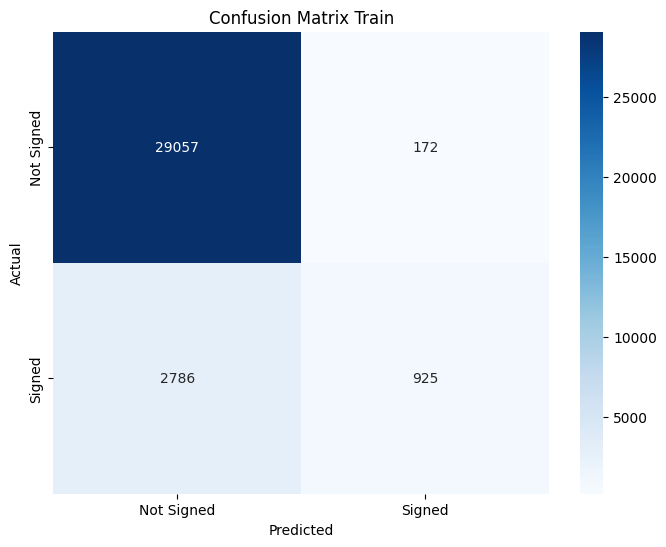

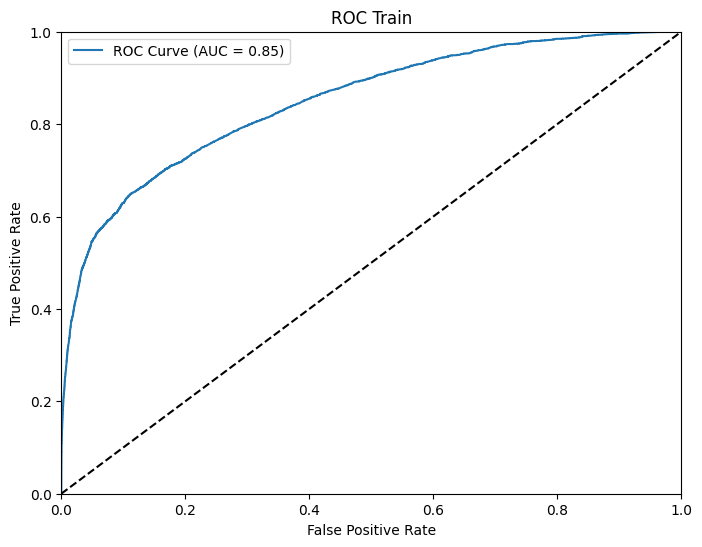

F1 Score Validation: 0.29873417721518986
AUC Score Validation: 0.8174825091302871
Classification Report Validation:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7308
           1       0.69      0.19      0.30       928

    accuracy                           0.90      8236
   macro avg       0.80      0.59      0.62      8236
weighted avg       0.88      0.90      0.87      8236

Confusion Matrix Validation:
 [[7228   80]
 [ 751  177]]


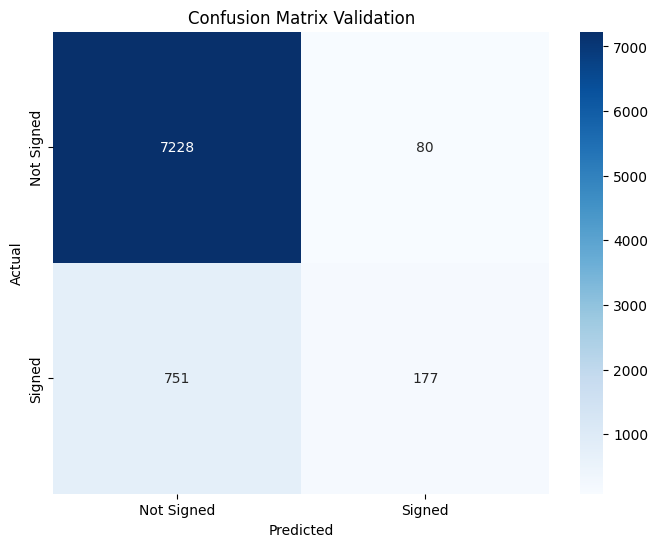

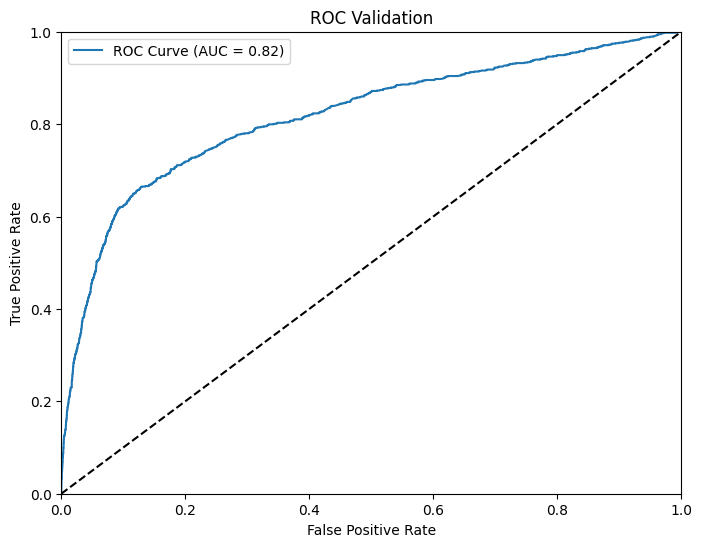

In [32]:
predict_and_evaluate(xgb_model, X_train, train_targets, name='Train')
predict_and_evaluate(xgb_model, X_val, val_targets, name='Validation')

## 5. Результати

In [33]:
results = [
    {"Модель": "Logistic Regression",
     "Гіперпараметри": "class_weight=balanced, solver='liblinear'", 
     "Train": "AUC=0.79, F1=0.44, P=0.34, R=0.63",  
     "Val":   "AUC=0.79, F1=0.45, P=0.35, R=0.65",  
     "Коментар": "Стабільна базова модель без ознак перенавчання. Добре ловить позитивний клас (високий Recall), але Precision низький – багато хибних відповідей. Може бути корисною як інтерпретований бенчмарк."},
     
    {"Модель": "KNeighborsClassifier",
     "Гіперпараметри": "n_neighbors=24, weights='uniform'", 
     "Train": "AUC=0.84, F1=0.26, P=0.75, R=0.16",  
     "Val":   "AUC=0.76, F1=0.22, P=0.66, R=0.13",  
     "Коментар": "Має низький Recall і F1. Хоч Precision високий, але модель пропускає більшість позитивних прикладів. Погано справляється з дисбалансом, непридатна для задачі."},

    {"Модель": "DecisionTreeClassifier",
     "Гіперпараметри": "max_leaf_nodes=9, max_depth=5", 
     "Train": "AUC=0.77, F1=0.30, P=0.71, R=0.19",  
     "Val":   "AUC=0.79, F1=0.28, P=0.70, R=0.18",  
     "Коментар": "Дерево не перенавчається (train ≈ val), але якість низька: модель часто не знаходить позитивні приклади (низький Recall). Проста, але слабка."},
    
    {"Модель": "XGBClassifier (Hyperopt)",
     "Гіперпараметри": "n_estimators=60, max_depth=10, learning_rate=0.063..., subsample=0.85, colsample_bytree=0.91, reg_alpha=0.76, reg_lambda=0.57",
     "Train": "AUC=0.89, F1=0.53, P=0.87, R=0.38",  
     "Val":   "AUC=0.81, F1=0.37, P=0.64, R=0.26",  
     "Коментар": "Високий Precision, але падає Recall – модель часто не ловить позитивні класи. На train значно кращі метрики, ніж на val → є перенавчання. Потребує більшого тюнінгу/регуляризації."},
    
    {"Модель": "XGBClassifier (RandomizedSearchCV)",
     "Гіперпараметри": "colsample_bytree=0.68, gamma=3.36, learning_rate=0.0077, max_depth=9, min_child_weight=2, n_estimators=1084, reg_alpha=0.0087, reg_lambda=0.0257, subsample=0.88",
     "Train": "AUC=0.84, F1=0.42, P=0.75, R=0.30", 
     "Val":   "AUC=0.82, F1=0.35, P=0.63, R=0.25",  
     "Коментар": "Більш збалансована, ніж Hyperopt-варіант: менше перенавчання, але метрики все одно середні. Precision відносно високий, Recall знову просідає. Можна експериментувати з методами боротьби з дисбалансом."}  
]

df_results = pd.DataFrame(results)
display(df_results)


,Модель,Гіперпараметри,Train,Val,Коментар
0,Logistic Regression,"class_weight=balanced, solver='liblinear'","AUC=0.79, F1=0.44, P=0.34, R=0.63","AUC=0.79, F1=0.45, P=0.35, R=0.65",Стабільна базова модель без ознак перенавчання...
1,KNeighborsClassifier,"n_neighbors=24, weights='uniform'","AUC=0.84, F1=0.26, P=0.75, R=0.16","AUC=0.76, F1=0.22, P=0.66, R=0.13",Має низький Recall і F1. Хоч Precision високий...
2,DecisionTreeClassifier,"max_leaf_nodes=9, max_depth=5","AUC=0.77, F1=0.30, P=0.71, R=0.19","AUC=0.79, F1=0.28, P=0.70, R=0.18","Дерево не перенавчається (train ≈ val), але як..."
3,XGBClassifier (Hyperopt),"n_estimators=60, max_depth=10, learning_rate=0...","AUC=0.89, F1=0.53, P=0.87, R=0.38","AUC=0.81, F1=0.37, P=0.64, R=0.26","Високий Precision, але падає Recall – модель ч..."
4,XGBClassifier (RandomizedSearchCV),"colsample_bytree=0.68, gamma=3.36, learning_ra...","AUC=0.84, F1=0.42, P=0.75, R=0.30","AUC=0.82, F1=0.35, P=0.63, R=0.25","Більш збалансована, ніж Hyperopt-варіант: менш..."


## 7. Важливість ознак XGBClassifier (RandomizedSearchCV)

                 feature  importance
59      poutcome_success    0.106758
2                  pdays    0.089531
6              euribor3m    0.082502
48             month_may    0.051980
5          cons.conf.idx    0.051340
50             month_oct    0.038115
4         cons.price.idx    0.037182
46             month_jun    0.036074
47             month_mar    0.031497
41     contact_telephone    0.026109
40      contact_cellular    0.021437
42             month_apr    0.019307
58  poutcome_nonexistent    0.015129
51             month_sep    0.014642
12           job_retired    0.013884
32       default_unknown    0.013706
44             month_dec    0.012648
31            default_no    0.012614
57      poutcome_failure    0.011506
3               previous    0.010667


<Figure size 1000x600 with 0 Axes>

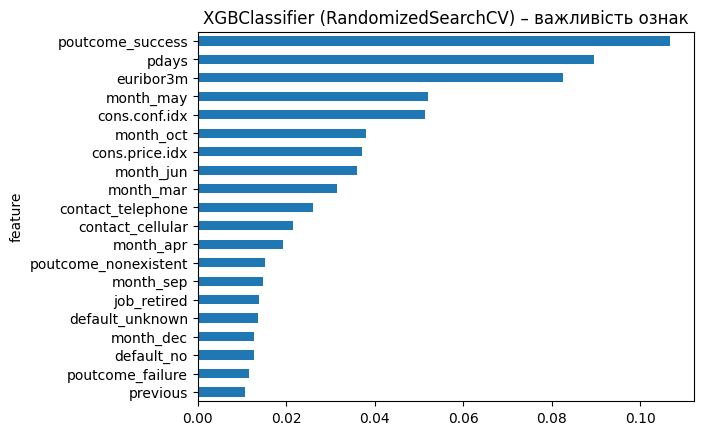

In [34]:
importances = xgb_rs.best_estimator_.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importance_df.head(20))


plt.figure(figsize=(10,6))
feature_importance_df.head(20).plot(kind='barh', x='feature', y='importance', legend=False)
plt.title("XGBClassifier (RandomizedSearchCV) – важливість ознак")
plt.gca().invert_yaxis()
plt.show()


**Топ важливих ознак**

1. `poutcome_success` (≈0.107) - якщо попередня маркетингова кампанія була успішною, ймовірність підписки дуже висока. Це логічно й підтверджує common sense.

2. `pdays` (≈0.089) - кількість днів після останнього контакту. Якщо клієнта контактували недавно, це сильно впливає. Абсолютно очікувано.

3. `euribor3m` (≈0.083) - макроекономічний показник (ставка Euribor). Висока важливість відповідає реальності: при кращій економічній ситуації клієнти охочіше відкривають депозити.

4. `month` (May, Oct, Jun, Mar, Apr, Sep, Dec) - місяць дзвінка. Це відображає сезонність: наприклад, у травні чи жовтні результати кампаній традиційно кращі. Common sense: люди частіше думають про фінансові рішення у певні місяці.

5. `cons.conf.idx / cons.price.idx` - індекс довіри споживачів і ціновий індекс. Логічно, що економічна впевненість впливає на фінансові рішення.

6. `contact_telephone / contact_cellular` - канал контакту. Telephone vs cellular справді впливає на ймовірність: дзвінки на мобільний ефективніші.

5. `poutcome_nonexistent / poutcome_failure` - якщо результат попередньої кампанії був відсутній чи невдалий, шанси підписки менші. Абсолютно логічно.

6. `job_retired` - пенсіонери охочіше погоджуються на депозити (common sense: стабільність доходу + бажання зберегти гроші).

7. `default_unknown / default_no` - інформація про кредитний дефолт, навіть “unknown” має сигнал. Це теж адекватно, бо фінансова надійність впливає на рішення.

8. `previous` - кількість попередніх контактів. Логічно: якщо банк вже неодноразово контактував із клієнтом, шанси змінюються.


## 8. SHAP

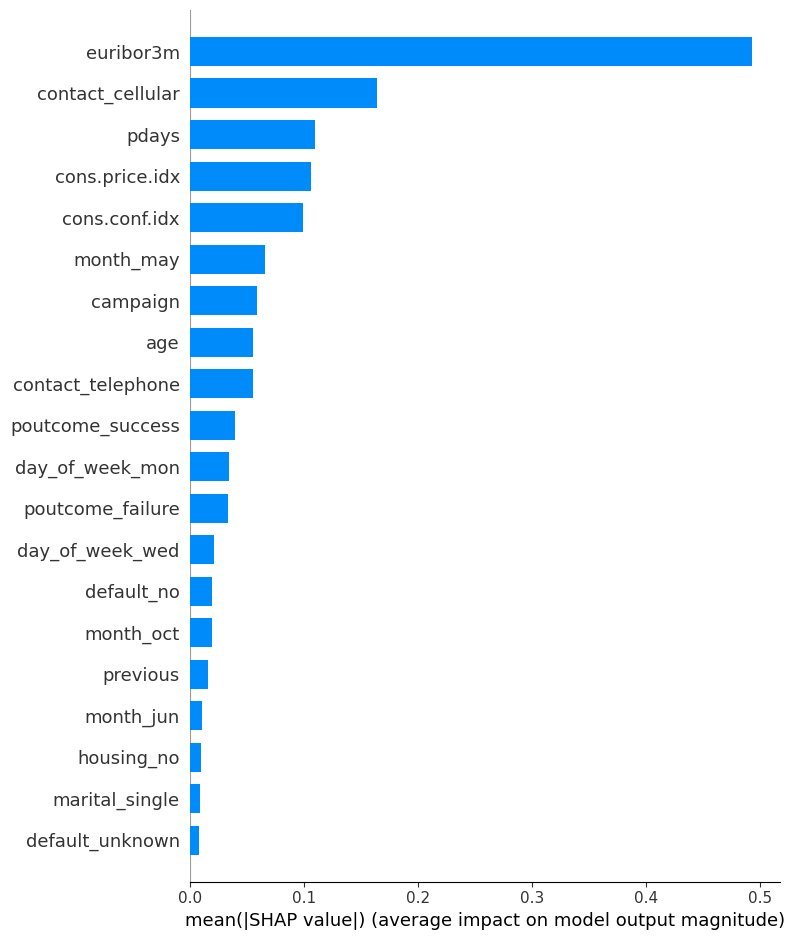

In [35]:
shap_values = shap.TreeExplainer(xgb_rs_model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

На відміну від вбудованої функцій важливості ознак, в нас інші показники важливості з SHAP. Tкономічні фактори (euribor3m, cons.price.idx), історія контактів (pdays, poutcome_success), канал зв’язку (contact_cellular) та сезонність (month) — дійсно найважливіші.
Модель робить акцент на тих змінних, які реально мають сенс з бізнес-точки зору.

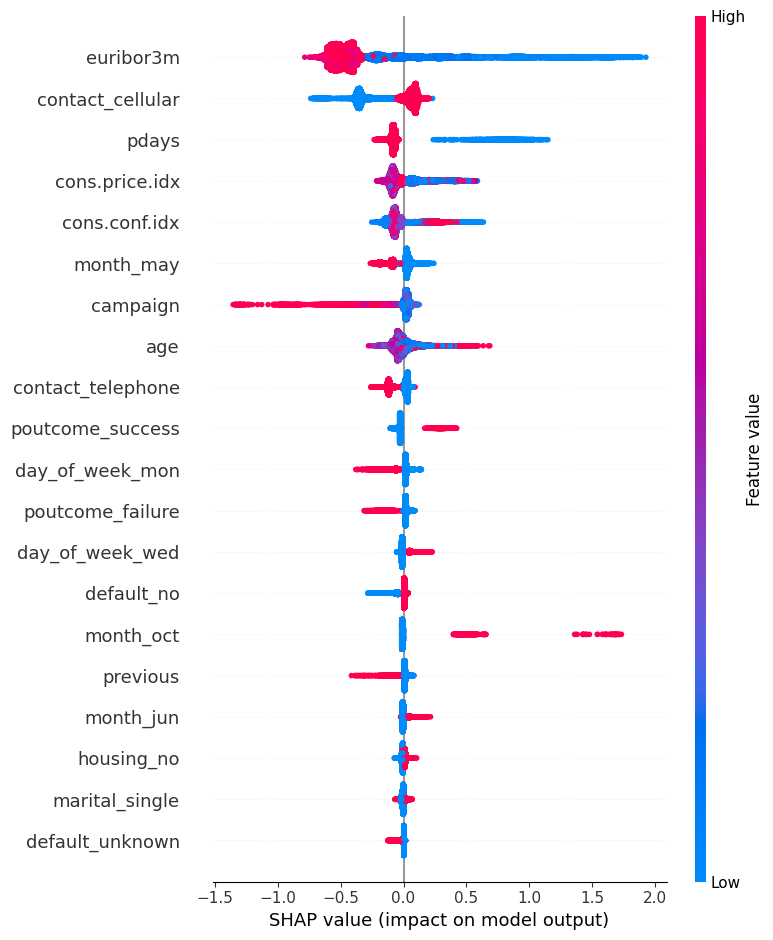

In [36]:
shap.summary_plot(shap_values, X_train)

1. euribor3m – найсильніший фактор. Високі значення (рожеві точки) тягнуть модель до “no”. Низькі значення (сині точки) – до “yes”.
Це логічно: при низькій ставці депозити вигідніші, клієнти частіше погоджуються.

2. contact_cellular - факт контакту через мобільний дає сильний позитивний внесок (штовхає до “yes”). Це відповідає здоровому глузду: мобільний зв’язок ефективніший, ніж стаціонарний чи інші канали.

3. pdays - великі значення (давно не контактували) – рожеві точки зліва → зменшують шанси на “yes”. Малі значення (недавно дзвонили) – сині праворуч - збільшують ймовірність.

4. cons.price.idx / cons.conf.idx - високі значення цих індексів більше тягнуть до “no”, нижчі – до “yes”. Це відображає вплив економічних очікувань: при низькій впевненості та низьких цінах люди охочіше вкладаються.

5. month_may / month_oct / інші місяці - month_may часто має позитивні значення (праворуч). Є сезонність: у деякі місяці кампанії працюють краще.

6. campaign (кількість контактів у поточній кампанії) - високі значення (багато дзвінків) = рух до “no”. Надмірна кількість спроб дратує клієнтів.

7. age - молоді (сині) частіше тягнуть до “no”. Старші (рожеві) – до “yes”. Пенсіонери та люди середнього віку більше схильні вкладати в депозити.

8. poutcome_success / poutcome_failure - успішний результат попередньої кампанії це сильний плюс. Провал, тягне до “no”.

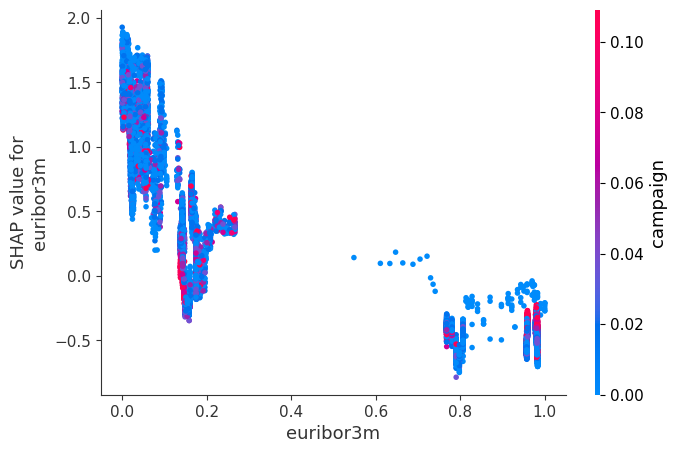

In [37]:
shap.dependence_plot("euribor3m", shap_values, X_train)

euribor3m – критичний фактор: низькі значення підвищують шанс депозиту, високі – зменшують. Отже тут можна простежити обернену залежність

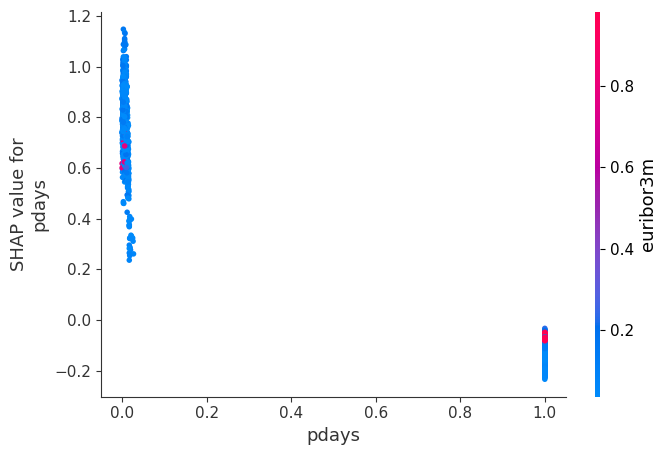

In [38]:
shap.dependence_plot("pdays", shap_values, X_train)

pdays є дуже важливим факторо. Недавній контакт це сильний плюс. Давній або відсутній контакт, гавпаки, мінус.

Це повністю відповідає healthy common sense: маркетингові кампанії працюють тоді, коли клієнт ще пам’ятає попередній контакт.

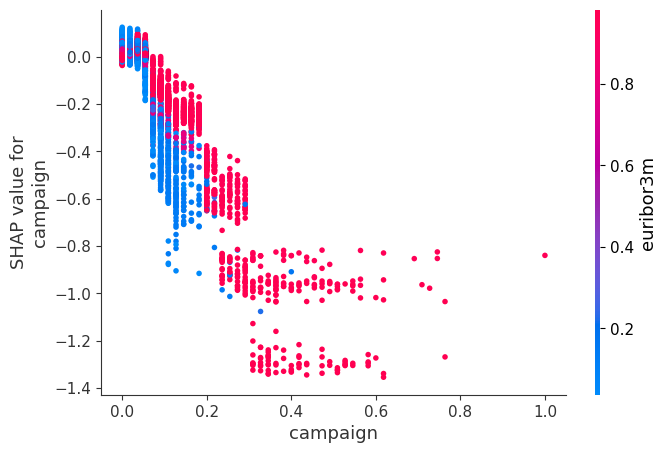

In [39]:
shap.dependence_plot("campaign", shap_values, X_train)

Найкраща стратегія: 1–2 контакти. Більше дзвінків - ймовірність успіху різко падає, незалежно від макроекономічних умов.

## 9. Аналіз помилок моделі

Confusion matrix:
 [[7176  132]
 [ 700  228]]
FP - середні значення ознак:
prediction              1.000000
default_no              0.977273
contact_cellular        0.931818
loan_no                 0.886364
cons.conf.idx           0.569164
                          ...   
job_housemaid           0.015152
marital_unknown         0.007576
education_illiterate    0.000000
default_yes             0.000000
true_label              0.000000
Length: 62, dtype: float64

FN - середні значення ознак:
true_label              1.000000
pdays                   0.970250
default_no              0.891429
loan_no                 0.854286
poutcome_nonexistent    0.812857
                          ...   
job_unknown             0.005714
marital_unknown         0.001429
education_illiterate    0.000000
default_yes             0.000000
prediction              0.000000
Length: 62, dtype: float64

TP середні значення:
default_no                       0.986842
contact_cellular                 0.903509
loan_no  

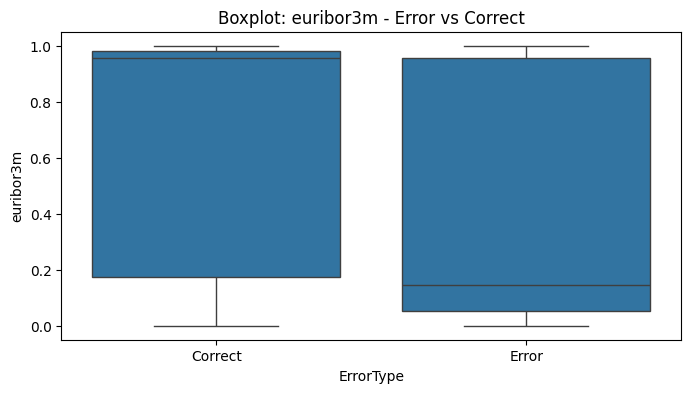

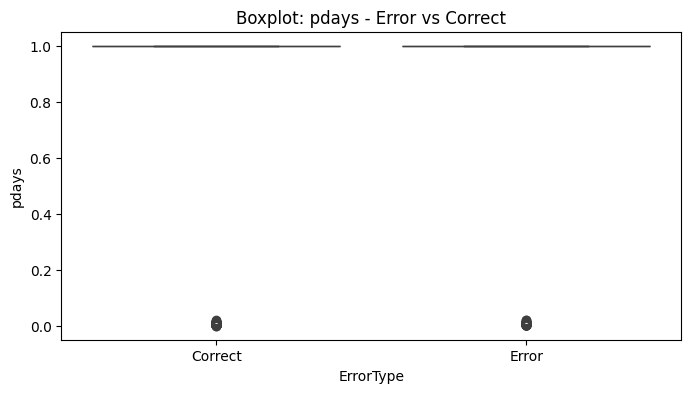

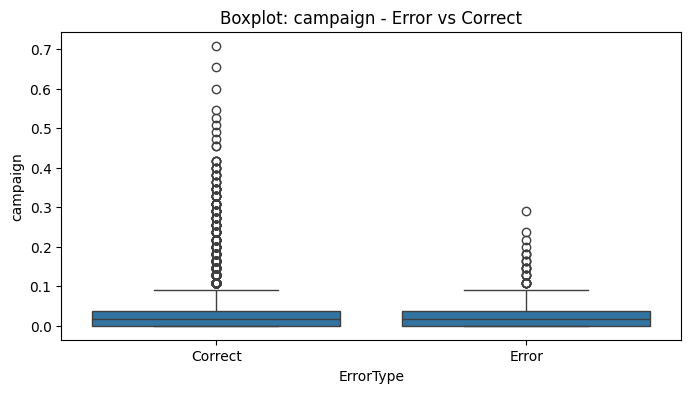

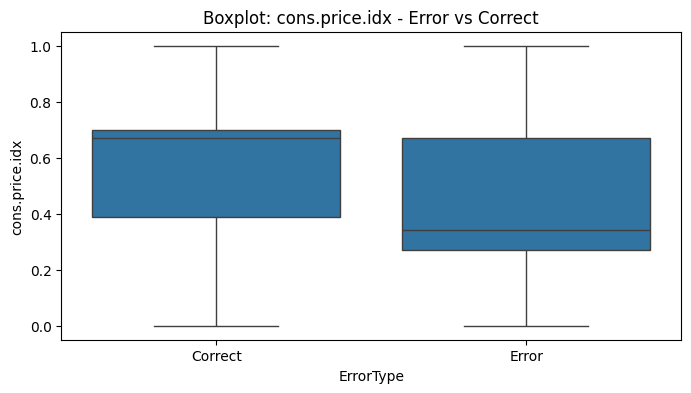

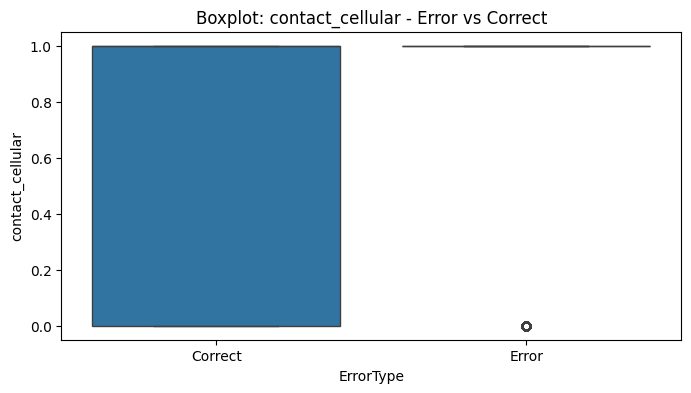

In [45]:
y_val_pred = xgb_rs_model.predict(X_val)
y_val_proba = xgb_rs_model.predict_proba(X_val)[:, 1]

# Конфузійна матриця
cm = confusion_matrix(val_targets, y_val_pred)
print("Confusion matrix:\n", cm)

# Індекси FP (передбачили yes, а насправді no)
fp_idx = np.where((y_val_pred == 1) & (val_targets == 0))[0]

# Індекси FN (передбачили no, а насправді yes)
fn_idx = np.where((y_val_pred == 0) & (val_targets == 1))[0]

# Створити датафрейми для FP і FN
X_val_fp = X_val.iloc[fp_idx].copy()
X_val_fn = X_val.iloc[fn_idx].copy()

# Додати предикти (для аналізу)
X_val_fp["prediction"] = y_val_pred[fp_idx]
X_val_fp["true_label"] = val_targets.iloc[fp_idx].values

X_val_fn["prediction"] = y_val_pred[fn_idx]
X_val_fn["true_label"] = val_targets.iloc[fn_idx].values

print("FP - середні значення ознак:")
print(X_val_fp.mean().sort_values(ascending=False))

print("\nFN - середні значення ознак:")
print(X_val_fn.mean().sort_values(ascending=False))

# Індекси True Positives і True Negatives
tp_idx = np.where((y_val_pred == 1) & (val_targets == 1))[0]
tn_idx = np.where((y_val_pred == 0) & (val_targets == 0))[0]

# Середні значення
print("\nTP середні значення:")
print(X_val.iloc[tp_idx].mean().sort_values(ascending=False))

print("\nTN середні значення:")
print(X_val.iloc[tn_idx].mean().sort_values(ascending=False))

important_features = ['euribor3m', 'pdays', 'campaign', 'cons.price.idx', 'contact_cellular']

for feat in important_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=X_val.assign(ErrorType=np.where(val_targets != y_val_pred, "Error", "Correct")), x="ErrorType", y=feat)
    plt.title(f"Boxplot: {feat} - Error vs Correct")
    plt.show()

`False Positives (FP)` – модель передбачила “так”, але насправді “ні”:

 - Часто зустрічається contact_cellular = 1 → тобто клієнт був доступний телефоном.

 - Високі значення loan_no, default_no → клієнт не має кредитів / дефолтів.

 - Високі значення euribor3m, cons.conf.idx → сприятлива економічна ситуація.

Модель імовірно “занадто оптимістична” щодо клієнтів із хорошими економічними умовами.

`False Negatives (FN)` – модель передбачила “ні”, але насправді “так”:

 - Часто зустрічається pdays ≈ 0, poutcome_nonexistent = 1 → клієнта давно або ніколи не контактували.

 - Високе default_no, loan_no — проте, все одно помилка.

Модель ігнорує важливі позитивні сигнали для раніше неактивних клієнтів.

euribor3m: при нижчих значеннях індексу (≈0–0.2) — більше помилок і модель переоцінює.

pdays: при значенні близькому до 1 (нещодавній контакт) — майже завжди правильне передбачення.

campaign: якщо кількість контактів із клієнтом велика то частіше виникають помилки.

contact_cellular: коли контакт через мобільний був, а результат — негативний, то модель схильна помилятися.

Модель має схильність до оптимістичних FP помилок у хороші економічні періоди та недооцінки FN помилок у сегменті раніше неконтактованих клієнтів. Це можна виправити через додаткові ознаки або зміну ваг класів.